tb - 6/14/2022 - Compare various models in a (complexity,performance) plane and make large figures for the 23rd AMS AOFD (2022)

# Initialization and Figure parameters

In [138]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager
from matplotlib import colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import pandas as pd
import numpy as np
import pickle as pkl
import json

import os
import xarray as xr

In [2]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

/tmp/ipykernel_3738801/4125692547.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  green_cmap = cm.get_cmap('YlGn', 5)


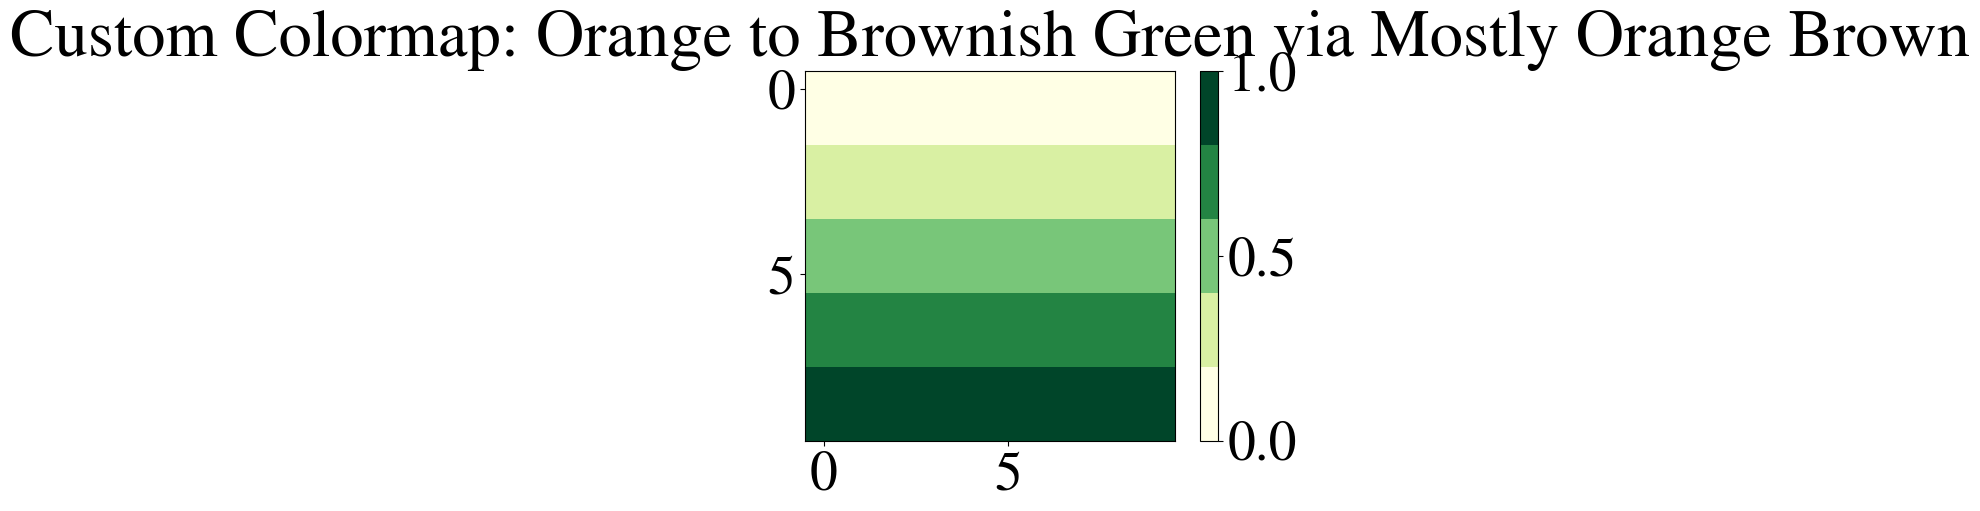

In [3]:
# Define the colors for the distilled model colormap
green_cmap = cm.get_cmap('YlGn', 5)
# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)
# Plot the data using the custom colormap
plt.imshow(data, cmap=green_cmap)
plt.colorbar()
plt.title('Custom Colormap: Orange to Brownish Green via Mostly Orange Brown')
plt.show()

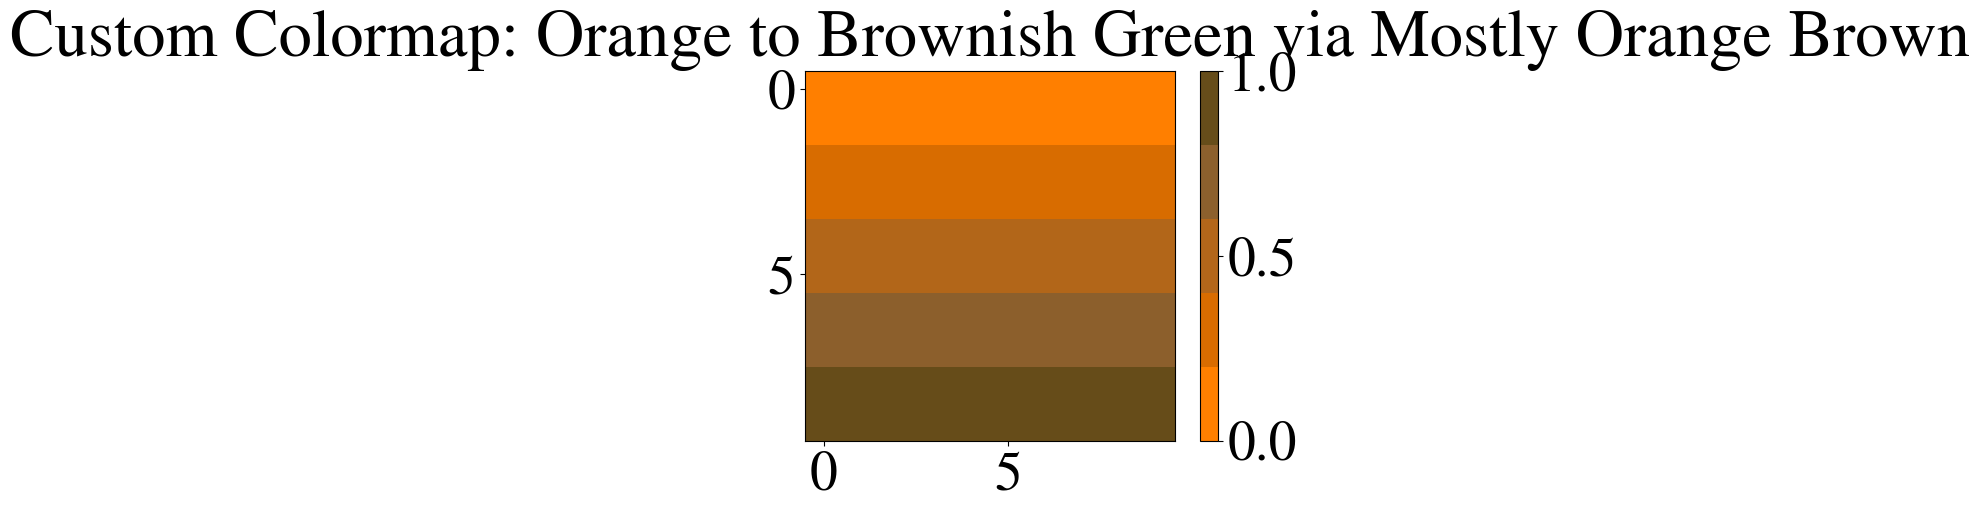

In [4]:
# Define the colors for the NN colormap
colors = [(1.0, 0.5, 0.0),   # Orange
          (0.8, 0.4, 0.0),   # Brown with mostly orange
          (0.6, 0.4, 0.2),   # Brown with some green
          (0.4, 0.3, 0.1)]   # Darker brown

# Create the colormap
orange_cmap = LinearSegmentedColormap.from_list('OrangeToBrownGreen', colors, N=5)

# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)

# Plot the data using the custom colormap
plt.imshow(data, cmap=orange_cmap)
plt.colorbar()
plt.title('Custom Colormap: Orange to Brownish Green via Mostly Orange Brown')
plt.show()

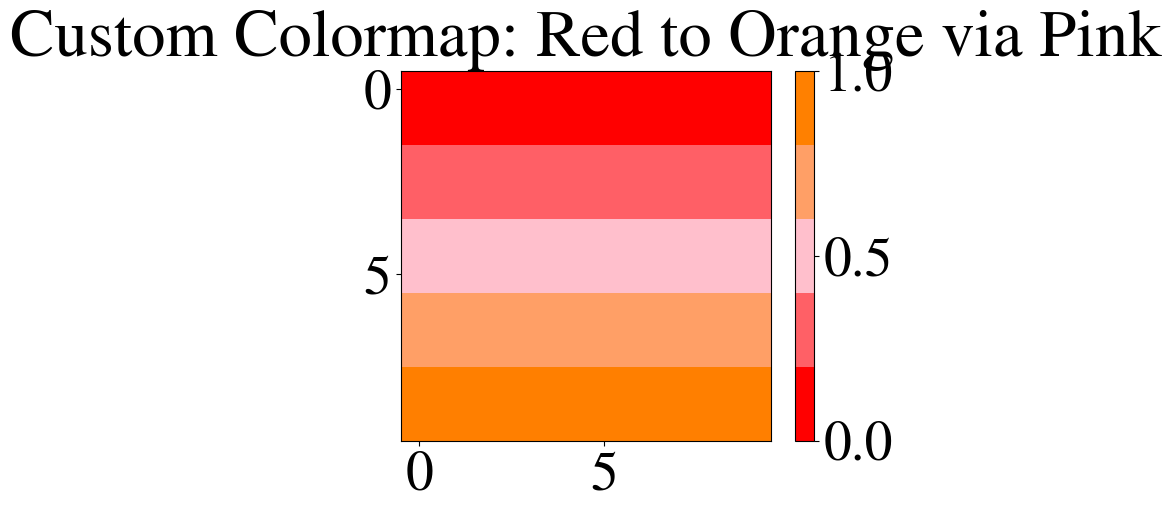

In [5]:
# Define the colors for the colormap
colors = [(1.0, 0.0, 0.0),   # Red
          (1.0, 0.75, 0.8),  # Pink
          (1.0, 0.5, 0.0)]   # Orange

# Create the colormap
red_cmap = LinearSegmentedColormap.from_list('RedPinkOrange', colors, N=5)

# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)

# Plot the data using the custom colormap
plt.imshow(data, cmap=red_cmap)
plt.colorbar()
plt.title('Custom Colormap: Red to Orange via Pink')
plt.show()

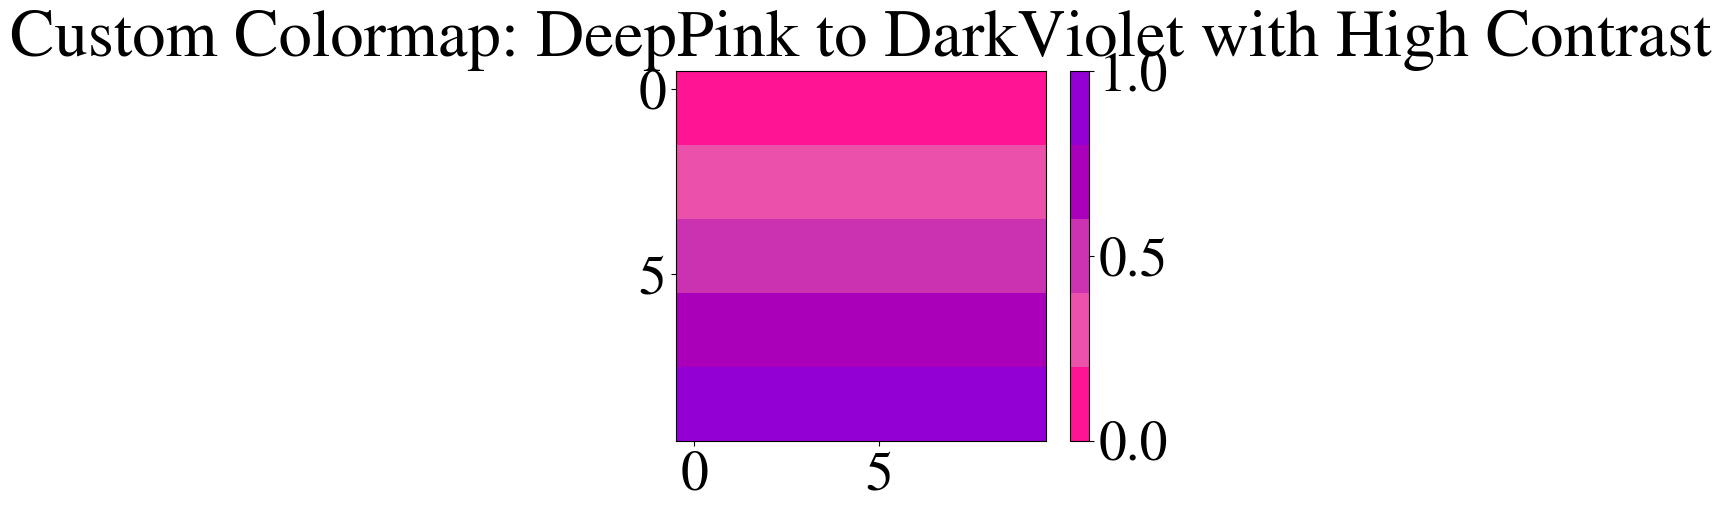

In [7]:
# Define the colors for the colormap with significantly increased contrast
colors = [
    (1.0, 0.08, 0.58),  # DeepPink
    (0.9, 0.4, 0.7),   # Distinct intermediate color
    (0.7, 0.0, 0.7),   # Another distinct intermediate color
    (0.58, 0.0, 0.83)  # DarkViolet
]

# Create the colormap
pink_cmap = LinearSegmentedColormap.from_list('DeepPinkDarkViolet', colors, N=5)

# Generate some data
data = np.linspace(0, 1, 100).reshape(10, 10)

# Plot the data using the custom colormap
plt.imshow(data, cmap=pink_cmap)
plt.colorbar()
plt.title('Custom Colormap: DeepPink to DarkViolet with High Contrast')
plt.show()

# Error statistics for various models

## (OLD) SW radiation

In [4]:
SW = {}

### Empirical parameterization

In [5]:
#SW['emp'] = {}
SW['emp201920'] = {}

In [6]:
# CF['emp']['number_p'] = 3
# CF['emp']['param'] = np.array([0.05213128, 0.00579355, 0.00343533])
# CF['emp']['MSE_train'] = 1064.4172
# CF['emp']['MSE_test'] = 2161.1487


In [7]:
SW['emp201920']['number_p'] = 3
SW['emp201920']['param'] = np.array([0.05319668, 0.00607786, 0.00352458])
SW['emp201920']['MSE_train'] = 1076.68
SW['emp201920']['MSE_test'] = 2412.6987
SW['emp201920']['Sample_train'] = 1929646
SW['emp201920']['Sample_test'] = 260300

### U-net ++

In [8]:
SW['Unet++'] = {}

In [9]:
SW['Unet++']['number_p'] = 14937052

Caveat: This is an estimation of the error based on 200000 samples from each year, noting that the U-net++ was optimized for the heating rates and not the fluxes, so the flux version would likely do better

In [10]:
SW['Unet++']['MSE_train'] = 10.23699176290765
SW['Unet++']['MSE_test'] = 159.293249502594

### Linear models

In [11]:
path_poly_fits = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Polynomial_Fits/'

In [12]:
path_linear = path_poly_fits+'2022_06_14_deg1_cv2'

In [13]:
tmp = pkl.load(open(path_linear,'rb'))

In [14]:
#tmp

In [15]:
for key in tmp.keys():
    ind_space = key.rfind(' ')
    new_key = 'Lin_'+key[ind_space+1:]
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = tmp[key]['MSE_train']
    SW[new_key]['MSE_test'] = tmp[key]['MSE_test']
    SW[new_key]['number_p'] = int(key[ind_space+1:])

### Quadratic models

In [16]:
path_quadratic = path_poly_fits+'2022_06_14_deg2_cv2'
path_quadratic_all = path_poly_fits+'2022_06_14_deg2_all_cv2'

In [17]:
tmp = pkl.load(open(path_quadratic,'rb'))

In [18]:
#tmp

In [19]:
for key in tmp.keys():
    ind_space = key.rfind(' ')
    new_key = 'Quad_'+key[ind_space+1:]
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = tmp[key]['MSE_train']
    SW[new_key]['MSE_test'] = tmp[key]['MSE_test']
    SW[new_key]['number_p'] = int(key[ind_space+1:])

In [20]:
tmp = pkl.load(open(path_quadratic_all,'rb'))

In [21]:
new_key = 'Quad_78'

In [22]:
SW[new_key] = {}
SW[new_key]['MSE_train'] = tmp['MSE_train']
SW[new_key]['MSE_test'] = tmp['MSE_test']
SW[new_key]['number_p'] = 79

### Cubic models

In [23]:
path_cubic = path_poly_fits+'2022_06_14_deg3_cv2'
path_cubic_all = path_poly_fits+'2022_06_14_deg3_all_cv2'

In [24]:
for i in range(7):
    if i==0: dic = {'p RH': -0.4822756120218817, 'LR_Bias': 0.9024607506072879, 'mse_train': 0.019048508576406897, 'mse_test': 0.023078014485909445, 'MSE_train': 4253.850931509128, 'MSE_test': 16946.97581075629}
    elif i==1: dic = {'p RH': -0.38004582817768684, 'albedo^2 p': -0.43955220869825473, 'LR_Bias': 0.9187550574437138, 'mse_train': 0.013977500743757051, 'mse_test': 0.013489997562172791, 'MSE_train': 2163.3306372469074, 'MSE_test': 7289.725072306403}
    elif i==2: dic = {'QLup': -3.587518905192296, 'p RH': -0.3012835287314158, 'albedo^2 p': -0.49961734583205464, 'LR_Bias': 0.9106828305818481, 'mse_train': 0.009741659842438851, 'mse_test': 0.008088753669460836, 'MSE_train': 1335.304195182617, 'MSE_test': 3956.149456598277}
    elif i==3: dic = {'QLup': -3.384120253133853, 'p QLdo': -4.333831885300157, 'p RH': -0.292798980870117, 'albedo^2 p': -0.5090229168821209, 'LR_Bias': 0.9208187224623304, 'mse_train': 0.007403120429805996, 'mse_test': 0.0063799143472923914, 'MSE_train': 1012.9890503784578, 'MSE_test': 2870.290123904773}
    elif i==4: dic = {'cos_za': 0.17245283933152206, 'QLup': -3.3804399966139638, 'p QLdo': -4.329471663763503, 'p RH': -0.3041398120866533, 'albedo^2 p': -0.43368830490818855, 'LR_Bias': 0.8530731187415826, 'mse_train': 0.00575411056942293, 'mse_test': 0.004512980975447759, 'MSE_train': 709.0689576499013, 'MSE_test': 1470.10937856905}
    elif i==5: dic = {'cos_za': 0.17146928047061902, 'QLup': -5.5620419041785585, 'p QLdo': -4.256517177058628, 'p RH': -0.28072064992702717, 'albedo^2 p': -0.445432020642893, 'QLup^2 RH': 10.537654373618613, 'LR_Bias': 0.8505643717706675, 'mse_train': 0.004843531906139132, 'mse_test': 0.0035876120526334852, 'MSE_train': 607.4477449136311, 'MSE_test': 1285.7283375140992}
    elif i==6: dic = {'cos_za': 0.196510896975951, 'QLup': -5.784680125585407, 'p T': -0.20178857630873148, 'p QLdo': -4.411178357488806, 'p RH': -0.14005708774344705, 'albedo^2 p': -0.4606599100538826, 'QLup^2 RH': 11.056780131041556, 'LR_Bias': 0.8675793487831843, 'mse_train': 0.003908292989479232, 'mse_test': 0.0030441254230503846, 'MSE_train': 444.6971678548561, 'MSE_test': 1250.3826502668494}
    
    new_key = 'Cubic_'+str(int(i+1))
    SW[new_key] = {}
    SW[new_key]['MSE_train'] = dic['MSE_train']
    SW[new_key]['MSE_test'] = dic['MSE_test']
    SW[new_key]['number_p'] = i+2

In [25]:
# Features selected by forward sequential selection: ['p RH']
# {'p RH': -0.4822756120218817, 'LR_Bias': 0.9024607506072879, 'mse_train': 0.019048508576406897, 'mse_test': 0.023078014485909445, 'MSE_train': 4253.850931509128, 'MSE_test': 16946.97581075629}
# Features selected by forward sequential selection: ['p RH', 'albedo^2 p']
# {'p RH': -0.38004582817768684, 'albedo^2 p': -0.43955220869825473, 'LR_Bias': 0.9187550574437138, 'mse_train': 0.013977500743757051, 'mse_test': 0.013489997562172791, 'MSE_train': 2163.3306372469074, 'MSE_test': 7289.725072306403}
# Features selected by forward sequential selection: ['QLup', 'p RH', 'albedo^2 p']
# {'QLup': -3.587518905192296, 'p RH': -0.3012835287314158, 'albedo^2 p': -0.49961734583205464, 'LR_Bias': 0.9106828305818481, 'mse_train': 0.009741659842438851, 'mse_test': 0.008088753669460836, 'MSE_train': 1335.304195182617, 'MSE_test': 3956.149456598277}
# Features selected by forward sequential selection: ['QLup', 'p QLdo', 'p RH', 'albedo^2 p']
# {'QLup': -3.384120253133853, 'p QLdo': -4.333831885300157, 'p RH': -0.292798980870117, 'albedo^2 p': -0.5090229168821209, 'LR_Bias': 0.9208187224623304, 'mse_train': 0.007403120429805996, 'mse_test': 0.0063799143472923914, 'MSE_train': 1012.9890503784578, 'MSE_test': 2870.290123904773}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p QLdo', 'p RH', 'albedo^2 p']
# {'cos_za': 0.17245283933152206, 'QLup': -3.3804399966139638, 'p QLdo': -4.329471663763503, 'p RH': -0.3041398120866533, 'albedo^2 p': -0.43368830490818855, 'LR_Bias': 0.8530731187415826, 'mse_train': 0.00575411056942293, 'mse_test': 0.004512980975447759, 'MSE_train': 709.0689576499013, 'MSE_test': 1470.10937856905}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p QLdo', 'p RH', 'albedo^2 p', 'QLup^2 RH']
# {'cos_za': 0.17146928047061902, 'QLup': -5.5620419041785585, 'p QLdo': -4.256517177058628, 'p RH': -0.28072064992702717, 'albedo^2 p': -0.445432020642893, 'QLup^2 RH': 10.537654373618613, 'LR_Bias': 0.8505643717706675, 'mse_train': 0.004843531906139132, 'mse_test': 0.0035876120526334852, 'MSE_train': 607.4477449136311, 'MSE_test': 1285.7283375140992}
# Features selected by forward sequential selection: ['cos_za', 'QLup', 'p T', 'p QLdo', 'p RH', 'albedo^2 p', 'QLup^2 RH']
# {'cos_za': 0.196510896975951, 'QLup': -5.784680125585407, 'p T': -0.20178857630873148, 'p QLdo': -4.411178357488806, 'p RH': -0.14005708774344705, 'albedo^2 p': -0.4606599100538826, 'QLup^2 RH': 11.056780131041556, 'LR_Bias': 0.8675793487831843, 'mse_train': 0.003908292989479232, 'mse_test': 0.0030441254230503846, 'MSE_train': 444.6971678548561, 'MSE_test': 1250.3826502668494}

In [26]:
tmp = pkl.load(open(path_cubic_all,'rb'))

In [27]:
new_key = 'Cubic_364'

In [28]:
SW[new_key] = {}
SW[new_key]['MSE_train'] = tmp['MSE_train']
SW[new_key]['MSE_test'] = tmp['MSE_test']
SW[new_key]['number_p'] = 365

### GFS dataset

In [29]:
path_Ryan_models = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2022_Ryan_GFS_Dataset/'

In [30]:
Ryan_GFS_models = pd.read_csv(open(path_Ryan_models+'results_summary.csv','rb'),delimiter=', ')

/tmp/ipykernel_2443160/701997197.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Ryan_GFS_models = pd.read_csv(open(path_Ryan_models+'results_summary.csv','rb'),delimiter=', ')


In [31]:
Ryan_GFS_models

,model_type,model_hyperparams,num_model_params,shortwave_surface_down_flux_mae_w_m02,shortwave_surface_down_flux_mse_w2_m04
0,cnn,num-levels=1_num-first-layer-channels=02,12630,8.827321,155.854889
1,cnn,num-levels=1_num-first-layer-channels=04,24228,8.456271,137.143738
2,cnn,num-levels=1_num-first-layer-channels=08,47424,6.869787,95.576981
3,cnn,num-levels=1_num-first-layer-channels=16,93816,7.762746,136.419281
4,cnn,num-levels=1_num-first-layer-channels=32,186600,7.165772,95.851135
...,...,...,...,...,...
104,u_net_plusplus,num-levels=5_num-first-layer-channels=04,260499,7.182575,104.126732
105,u_net_plusplus,num-levels=5_num-first-layer-channels=08,1003478,6.878008,69.628983
106,u_net_plusplus,num-levels=5_num-first-layer-channels=16,3903804,5.710857,51.133381
107,u_net_plusplus,num-levels=5_num-first-layer-channels=32,15271975,6.186837,56.223866


## (2024) Cloud fraction

### QUBICC

In [17]:
path_Arthur = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Arthur/'

In [18]:
mse_scores = pkl.load(open(path_Arthur+'mse_scores.pkl','rb'))
no_param = pkl.load(open(path_Arthur+'no_parameters.pkl','rb'))


In [19]:
no_param['sq_man_tun'] = 8 # Because separately calibrated over land and ocean

In [20]:
mse_scores.keys()

dict_keys(['column_NN', 'region_NN', 'cell_NN', 'pol_deg_3', 'pol_deg_3_feat_6', 'pol_deg_2', 'pol_deg_2_feat_5', 'lin_2', 'lin_3', 'lin_4', 'lin_5', 'lin_6', 'lin_7', 'lin_8', 'lin_9', 'lin_10', 'lin_11', 'lin_12', 'lin_13', 'lin_14', 'lin_15', 'lin_16', 'lin_17', 'lin_18', 'sq_man_tun'])

### DYAMOND

In [21]:
dyamond = json.load(open(path_Arthur+'cl_area_pareto_frontier.json','rb'))

In [22]:
dyamond.keys()

dict_keys(['Complexity/Number of parameters', 'MSE scores on validation set'])

In [23]:
dyamond['Complexity/Number of parameters'].keys()

dict_keys(['lin_cl_area_2', 'lin_cl_area_3', 'lin_cl_area_4', 'lin_cl_area_5', 'lin_cl_area_6', 'lin_cl_area_7', 'lin_cl_area_8', 'lin_cl_area_9', 'lin_cl_area_10', 'lin_cl_area_11', 'lin_cl_area_12', 'lin_cl_area_13', 'lin_cl_area_14', 'lin_cl_area_15', 'lin_cl_area_16', 'lin_cl_area_17', 'lin_cl_area_18', 'lin_cl_area_19', 'lin_cl_area_20', 'lin_cl_area_21', 'lin_cl_area_22', 'lin_cl_area_23', 'pol_deg_2_cl_area_1', 'pol_deg_2_cl_area_2', 'pol_deg_2_cl_area_3', 'pol_deg_2_cl_area_4', 'pol_deg_2_cl_area_5', 'pol_deg_2_cl_area_6', 'pol_deg_2_cl_area_7', 'pol_deg_2_cl_area_8', 'pol_deg_2_cl_area_9', 'pol_deg_2_cl_area_10', 'pol_deg_2_cl_area_11', 'pol_deg_2_cl_area_12', 'pol_deg_2_cl_area_13', 'pol_deg_2_cl_area_14', 'pol_deg_2_cl_area_15', 'pol_deg_2_cl_area_16', 'pol_deg_2_cl_area_17', 'pol_deg_2_cl_area_18', 'pol_deg_2_cl_area_19', 'pol_deg_2_cl_area_20', 'pol_deg_2_cl_area_21', 'pol_deg_2_cl_area_22', 'pol_deg_2_cl_area_23', 'pol_deg_2_cl_area_24', 'pol_deg_2_cl_area_25', 'pol_deg_3

### DYAMOND - Dec 2022

In [24]:
path_Arthur22 = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/2021_Ryan_Lagerquist_SW/Arthur_data_122022/'

In [25]:
dyamond22 = json.load(open(path_Arthur22+'pareto_frontier/cl_area_pareto_frontier.json'))

In [26]:
dyamond22.keys()

dict_keys(['Complexity/Number of parameters', 'MSE scores on validation set'])

In [27]:
dyamond22['Complexity/Number of parameters'].keys()

dict_keys(['lin_cl_area_1', 'lin_cl_area_2', 'lin_cl_area_3', 'lin_cl_area_4', 'lin_cl_area_5', 'lin_cl_area_6', 'lin_cl_area_7', 'lin_cl_area_8', 'lin_cl_area_9', 'lin_cl_area_10', 'lin_cl_area_11', 'lin_cl_area_12', 'lin_cl_area_13', 'lin_cl_area_14', 'lin_cl_area_15', 'lin_cl_area_16', 'lin_cl_area_17', 'lin_cl_area_18', 'lin_cl_area_19', 'lin_cl_area_20', 'lin_cl_area_21', 'lin_cl_area_22', 'lin_cl_area_23', 'pol_deg_2_cl_area_1', 'pol_deg_2_cl_area_2', 'pol_deg_2_cl_area_3', 'pol_deg_2_cl_area_4', 'pol_deg_2_cl_area_5', 'pol_deg_2_cl_area_6', 'pol_deg_2_cl_area_7', 'pol_deg_2_cl_area_8', 'pol_deg_2_cl_area_9', 'pol_deg_2_cl_area_10', 'pol_deg_2_cl_area_11', 'pol_deg_2_cl_area_12', 'pol_deg_2_cl_area_13', 'pol_deg_2_cl_area_14', 'pol_deg_2_cl_area_15', 'pol_deg_2_cl_area_16', 'pol_deg_2_cl_area_17', 'pol_deg_2_cl_area_18', 'pol_deg_2_cl_area_19', 'pol_deg_2_cl_area_20', 'pol_deg_2_cl_area_21', 'pol_deg_2_cl_area_22', 'pol_deg_2_cl_area_23', 'pol_deg_2_cl_area_24', 'pol_deg_2_cl_are

# (Performance,Complexity) Plots

## Cloud fraction with DYAMOND - Dec 2022

In [28]:
# fig, ax = plt.subplots(1,1,figsize=(15,6))

# for k in dyamond22['Complexity/Number of parameters'].keys():
#     if 'lin_cl_area' in k: col = Green3_cmap(1); m='.'; skip = 0
#     elif 'deg_1_no_reg_2' in k: col = Green3_cmap(1); m='*'; skip = 0
#     elif 'grid_search' in k: col = 'orange'; skip = 0
#     elif 'pol_deg_2' in k: col = Green3_cmap(2); m='.'; skip = 0;
#     elif 'deg_2_no_reg_2' in k: col = Green3_cmap(2); m='*'; skip = 0
#     elif 'pol_deg_3' in k: col = Green3_cmap(3); m='.'; skip = 0;
#     elif 'deg_3_no_reg_2' in k: col = Green3_cmap(3); m='*'; skip = 0
#     elif 'cell_NN' in k: col = 'purple'; m='.'; skip = 0
#     elif 'seq_feat_sel_NN' in k: col = 'mediumturquoise'; m='.'; skip=0;
#     elif 'pysr' in k: col = 'lightsteelblue'; m='.';skip = 0
#     elif 'gpgomea' in k: col = 'gray'; m='.'; skip = 0
#     else: 
#         if 'NN' in k: col = 'b'; m = '.'; skip = 0
#         else: skip = 1
#     if skip==0:
#         ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
#                dyamond22['MSE scores on validation set'][k],
#                s=siz,color=col,zorder=1,marker=m)
# plt.ylabel('Mean-Squared Error (%)$^{2}$')
# plt.xlabel('Number of Parameters')
# plt.draw()

# labels = [item.get_text() for item in ax.get_xticklabels()]
# new_labels = []
# for label in labels:
#     label = '$10^{'+label+'}$'
#     new_labels = np.concatenate((new_labels,[label]))
# ax.set_xticklabels(new_labels);

# ax.set_ylim((0,699))

# YLIM0 = ax.get_ylim()
# XLIM0 = ax.get_xlim()

## Drawing the hierarchy and Pareto front using Figure 1's conventions

In [58]:
colors_fig1 = {
    "pale_blue": [222, 238, 248],
    "light_blue": [190, 223, 239],
    "medium_blue": [131, 197, 217],
    "deep_blue": [53, 144, 173],
    "dark_blue": [32, 88, 106]
}

# Convert each color component by dividing by 255
normalized_colors = {
    key: [value / 255 for value in values]
    for key, values in colors_fig1.items()
}
colors_fig1 = normalized_colors

In [59]:
fz = 40
lw = 2
siz = 100

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = lw
plt.rc('font',size=fz)

### Pareto functions

In [60]:
# Function to determine Pareto optimal points

def is_pareto_efficient_simple(costs):

    """
    Identify the Pareto-efficient points for a given set of costs.

    Parameters:
    costs (np.array): A 2D NumPy array where each row represents an individual point
                      in terms of its cost dimensions. For instance, each row could
                      represent a different configuration's cost as [cost1, cost2].

    Returns:
    np.array: A boolean array where True indicates that the corresponding point in
              'costs' is Pareto efficient.

    Description:
    This function iterates over each point and determines whether it is dominated
    by any other point. A point is considered Pareto efficient if no other point
    exists that is better in all cost dimensions. In this context, "better" is
    defined as being lower for each cost dimension since we are minimizing.

    The function uses a boolean array, `is_efficient`, to keep track of which
    points are currently considered Pareto efficient. Initially, all points are
    assumed to be Pareto efficient.

    For each point:
    1. If the point is still considered potentially Pareto efficient (`is_efficient[i]` is True),
       it checks against all other points that are also still marked as efficient.
    2. It updates the `is_efficient` array by setting it to False for any point
       that is dominated by the current point. A point `j` is dominated by point `i`
       if all its cost dimensions are greater than or equal to those of point `i`
       and at least one dimension is strictly greater.
    3. It ensures the current point's efficiency status remains True regardless of the
       comparison outcome by resetting `is_efficient[i]` to True after the comparison.

    The loop ensures that every point is compared with all others, and after processing,
    the `is_efficient` array flags only those points that are not dominated by any other,
    indicating the Pareto front.
    """

    is_efficient = np.ones(costs.shape[0], dtype=bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)  
            is_efficient[i] = True  
    return is_efficient

In [61]:
def extract_pareto_data(dataframe, key_substrings, 
                        original_dict=None, new_point_1_mse_scores=700, new_point_2_parameters=5.4,
                        key_x='Complexity/Number of parameters', key_y='MSE scores on validation set'):
    # Set default for original_dict if not provided
    if original_dict is None:
        original_dict = dyamond22[key_x].keys()

    # Filter keys by substrings
    filtered_keys = {
        key for key in original_dict
        if any(sub in key for sub in key_substrings)
    }

    # Extract parameters and MSE scores for the filtered models
    parameters = [np.log10(dataframe[key_x][k]) for k in filtered_keys]
    mse_scores = [dataframe[key_y][k] for k in filtered_keys]

    # Determine Pareto optimal points
    pareto_points = is_pareto_efficient_simple(np.column_stack((parameters, mse_scores)))

    # Extract current Pareto points
    pareto_parameters = np.array(parameters)[pareto_points]
    pareto_mse_scores = np.array(mse_scores)[pareto_points]

    # Sort the initial Pareto points based on parameters
    sorted_indices = np.argsort(pareto_parameters)
    pareto_parameters = pareto_parameters[sorted_indices]
    pareto_mse_scores = pareto_mse_scores[sorted_indices]

    # Define new points
    new_point_1_parameters = min(parameters)  # Minimum of all parameters
    new_point_2_mse_scores = min(mse_scores)  # Minimum of all scores

    # Insert new point 1 at the beginning
    pareto_parameters = np.insert(pareto_parameters, 0, new_point_1_parameters)
    pareto_mse_scores = np.insert(pareto_mse_scores, 0, new_point_1_mse_scores)

    # Append new point 2 at the end
    pareto_parameters = np.append(pareto_parameters, new_point_2_parameters)
    pareto_mse_scores = np.append(pareto_mse_scores, new_point_2_mse_scores)

    return parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys

### Figure 2 - Step 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


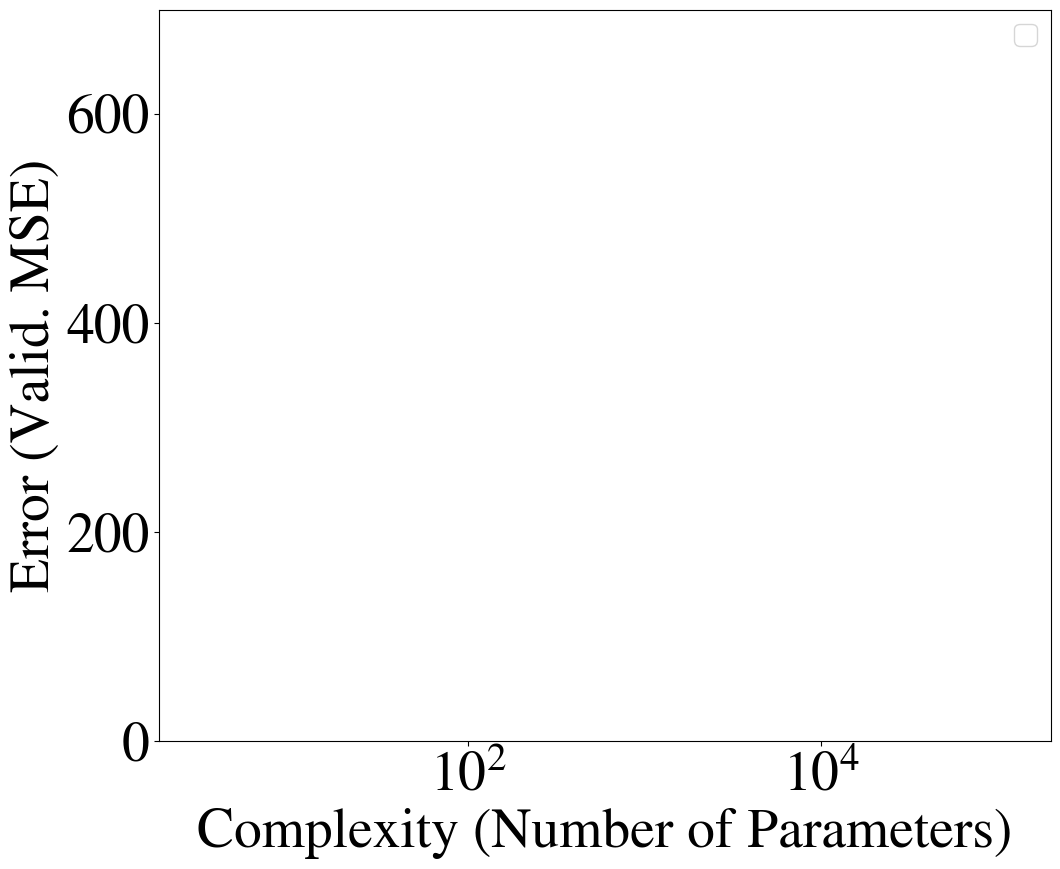

In [62]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Valid. MSE)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 2 - Step 1

In [63]:
parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys = \
    extract_pareto_data(dyamond22, key_substrings = [
        'lin_cl_area', 'deg_12', 'grid_search','sq','deg_2', 'deg_3'])

k= teixeira_grid_search


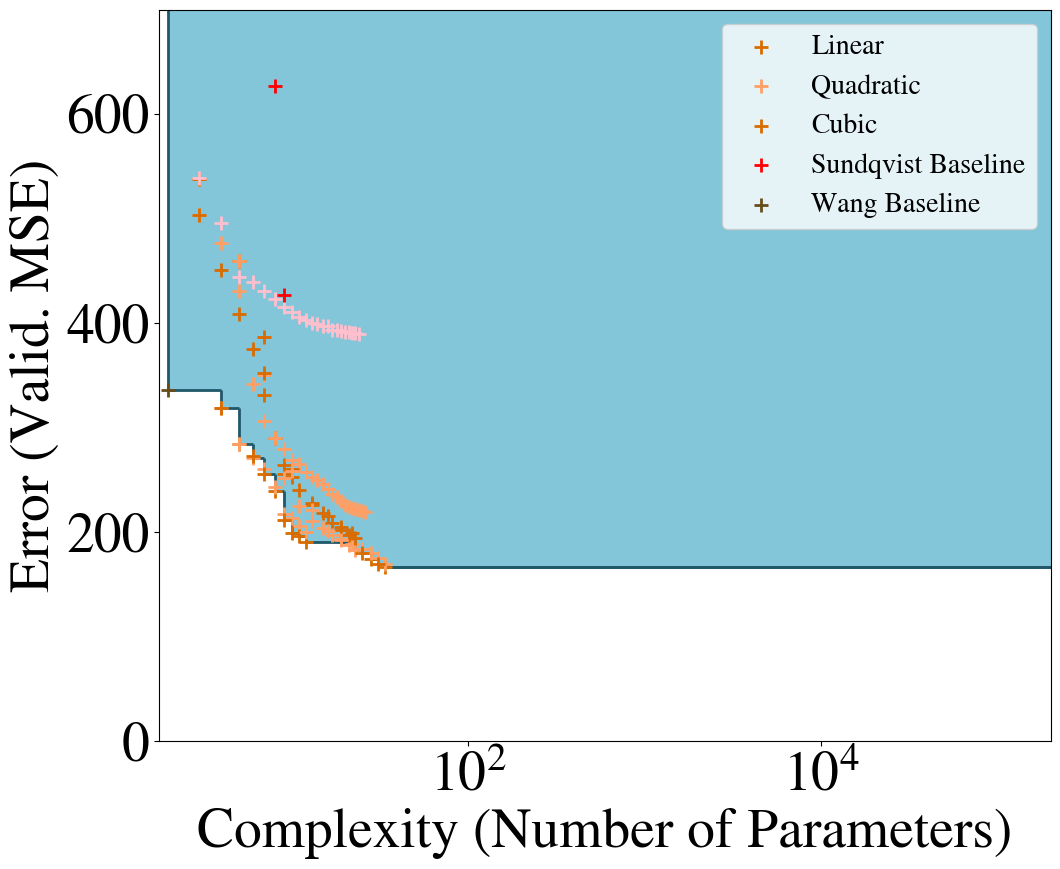

In [64]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys:
    skip = 0
    if 'lin_cl_area' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'deg_1' in k: col = red_cmap(2); m='+'; cap = ''; skip = 0
    elif 'sq_grid_search' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'Sundqvist Baseline'; skip = 0
    elif 'wang_grid_search' in k: col = orange_cmap(4); m='+'; cap = 'Wang Baseline'; skip = 0
    elif 'pol_deg_2' in k: col = red_cmap(3); m='+'; cap = 'Quadratic'; skip = 0
    elif 'deg_2' in k: col = red_cmap(3); m='+'; cap = ''; skip = 0
    elif 'pol_deg_3' in k: col = orange_cmap(1); m='+'; cap = 'Cubic'; skip = 0
    elif 'deg_3' in k: col = orange_cmap(1); m='+'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
               dyamond22['MSE scores on validation set'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Valid. MSE)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_labels = ['Linear', 'Quadratic', 'Cubic', 'Sundqvist Baseline', 'Wang Baseline']
new_handles = [by_label[label] for label in new_labels]
plt.legend(new_handles, new_labels,fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 2 - Step 2

In [65]:
parameters2, mse_scores2, pareto_parameters2, pareto_mse_scores2, filtered_keys2 = \
    extract_pareto_data(dyamond22, key_substrings = [
        'lin_cl_area', 'deg_12', 'grid_search','sq','deg_2', 'deg_3',
        'NN'])

k= teixeira_grid_search


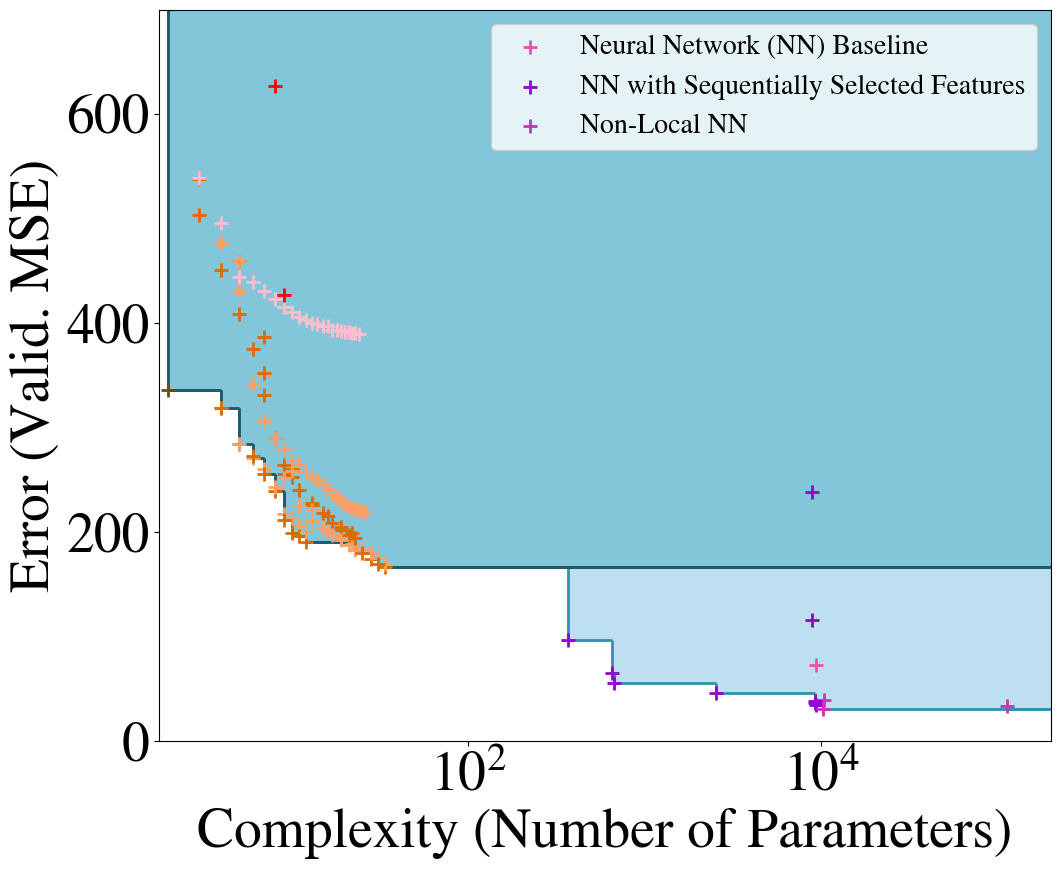

In [66]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], max(mse_scores2)], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), max(mse_scores2)], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], max(mse_scores2)], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys2:
    skip = 0
    if 'lin_cl_area' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'deg_1' in k: col = red_cmap(2); m='+'; cap = ''; skip = 0
    elif 'sq_grid_search' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'Sundqvist Baseline'; skip = 0
    elif 'wang_grid_search' in k: col = orange_cmap(4); m='+'; cap = 'Wang Baseline'; skip = 0
    elif 'pol_deg_2' in k: col = red_cmap(3); m='+'; cap = 'Quadratic'; skip = 0
    elif 'deg_2' in k: col = red_cmap(3); m='+'; cap = ''; skip = 0
    elif 'pol_deg_3' in k: col = orange_cmap(1); m='+'; cap = 'Cubic'; skip = 0
    elif 'deg_3' in k: col = orange_cmap(1); m='+'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
               dyamond22['MSE scores on validation set'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Valid. MSE)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2)
# Change the order of the last three labels
# to "Sundqvist Baseline", "Neural Network (NN) Baseline", and "NN with Sequentially Selected Features"
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# new_labels = ['Linear', 'Quadratic', 'Cubic', 'Sundqvist Baseline', 'Wang Baseline', 
#               'Neural Network (NN) Baseline', 'NN with Sequentially Selected Features']
new_labels = ['Neural Network (NN) Baseline', 'NN with Sequentially Selected Features', 'Non-Local NN']
new_handles = [by_label[label] for label in new_labels]
# Change the color of the 'NN with Sequentially Selected Features' label to pink_cmap(5)
new_handles[1].set_color(pink_cmap(5))
plt.legend(new_handles, new_labels,fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 2 - Step 3

In [67]:
parameters3, mse_scores3, pareto_parameters3, pareto_mse_scores3, filtered_keys3 = \
    extract_pareto_data(dyamond22, key_substrings = [
        'lin_cl_area', 'deg_12', 'grid_search','sq','deg_2', 'deg_3',
        'NN',
        'pysr', 'gpgomea'])

In [68]:
key_grid = {k for k in filtered_keys3 if 'grid_search' in k}
for k in key_grid:
    print('Mse score for key '+k+' is '+str(dyamond22['MSE scores on validation set'][k]))

Mse score for key teixeira_grid_search is 1373.496
Mse score for key wang_grid_search is 336.007
Mse score for key sq_grid_search is 626.2913314498377


k= teixeira_grid_search


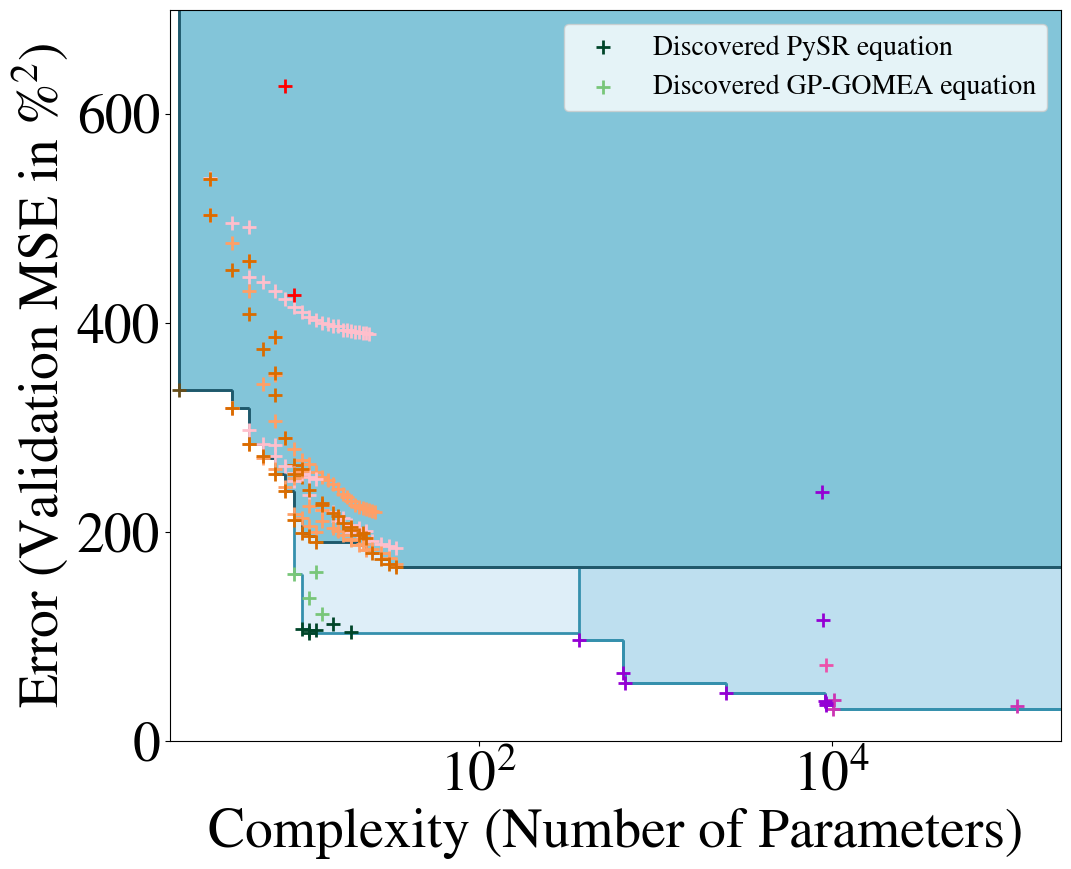

In [70]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 3)
for i in range(len(pareto_parameters3) - 1):
    ax.fill_betweenx([pareto_mse_scores3[i], max(mse_scores3)], 
                     pareto_parameters3[i], pareto_parameters3[i + 1], 
                     color=colors_fig1['pale_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores3), max(mse_scores3)], pareto_parameters3[-1], max(parameters3), 
                 color=colors_fig1['pale_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores3[0], max(mse_scores3)], min(parameters3), max(parameters3), 
                 color=colors_fig1['pale_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 3)
for i in range(len(pareto_parameters3)):
    if i > 0:
        ax.vlines(x=pareto_parameters3[i], ymin=pareto_mse_scores3[i-1], 
                  ymax=pareto_mse_scores3[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores3[i], xmin=pareto_parameters3[i], 
              xmax=pareto_parameters3[i+1] if i+1 < len(pareto_parameters3) else max(parameters3), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], max(mse_scores2)], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), max(mse_scores2)], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], max(mse_scores2)], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in dyamond22['Complexity/Number of parameters'].keys():
    if 'lin_cl_area' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'deg_1' in k: col = red_cmap(2); m='+'; cap = ''; skip = 0
    elif 'sq_grid_search' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'Sundqvist Baseline'; skip = 0
    elif 'wang_grid_search' in k: col = orange_cmap(4); m='+'; cap = 'Wang Baseline'; skip = 0
    elif 'pol_deg_2' in k: col = red_cmap(3); m='+'; cap = 'Quadratic'; skip = 0
    elif 'deg_2' in k: col = red_cmap(3); m='+'; cap = ''; skip = 0
    elif 'pol_deg_3' in k: col = orange_cmap(1); m='+'; cap = 'Cubic'; skip = 0
    elif 'deg_3' in k: col = orange_cmap(1); m='+'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(dyamond22['Complexity/Number of parameters'][k]),
               dyamond22['MSE scores on validation set'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((0.25, 5.3))
ax.set_ylim((0, 699))

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Validation MSE in $\%^2$)')
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2)
# Only keep the labels containing "equation"
new_labels = [label for label in labels if 'equation' in label]
new_handles = [by_label[label] for label in new_labels]
# Make sure the 'Discovered GP-GOMEA equation' uses a 'deeppink' color
# and the 'Discovered PySR equation' uses a darkviolet color
new_handles[0].set_color(green_cmap(2))
new_handles[1].set_color(green_cmap(5))
plt.legend(new_handles, new_labels,fontsize=fz/2)
# Eliminate redundant labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
new_labels = ['Discovered PySR equation', 'Discovered GP-GOMEA equation']
new_handles = [by_label[label] for label in new_labels]
plt.legend(new_handles, new_labels,fontsize=fz/2)

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

## (May24) Ryan's new data

In [42]:
path_CSV = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/CSV_DATA/'
path_data = path_CSV+'pareto2024_summary_for_tom_final.csv'

In [43]:
# open the csv file and display its data format
df = pd.read_csv(path_data, delimiter=',')
df.head(n=200)

,model_hyperparams,num_trainable_params,overall_heating_rate_mse_k2_day02,simple_heating_rate_mse_k2_day02,complex_heating_rate_mse_k2_day02
0,linear_regression,426087,1.325499,0.692107,1.304038
1,dense_net/num-levels=1_num-neurons-per-layer=0064,219905,0.770534,0.351853,1.060213
2,dense_net/num-levels=1_num-neurons-per-layer=0128,439681,0.721871,0.306659,0.944118
3,dense_net/num-levels=1_num-neurons-per-layer=0256,879233,0.615619,0.304696,0.848276
4,dense_net/num-levels=1_num-neurons-per-layer=0512,1758337,0.551181,0.262589,0.779084
...,...,...,...,...,...
104,u_net_plusplus/num-levels=5_num-first-layer-ch...,260955,0.236612,0.170369,0.295327
105,u_net_plusplus/num-levels=5_num-first-layer-ch...,1004390,0.121108,0.121406,0.134446
106,u_net_plusplus/num-levels=5_num-first-layer-ch...,3905628,0.105821,0.083070,0.116804
107,u_net_plusplus/num-levels=5_num-first-layer-ch...,15275623,0.045026,0.037655,0.069020


In [44]:
# In the model_hyperparams column, list the unique words before '_'
print(df['model_hyperparams'].str.split('_').str[0].unique())
print(df['model_hyperparams'].str.split('_').str[1].unique())
print(df['model_hyperparams'].str.split('_').str[2].unique())

['linear' 'dense' 'cnn/num-levels=1' 'cnn/num-levels=2' 'cnn/num-levels=3'
 'cnn/num-levels=4' 'cnn/num-levels=5' 'cnn/num-levels=6' 'u']
['regression' 'net/num-levels=1' 'net/num-levels=2' 'net/num-levels=3'
 'net/num-levels=4' 'net/num-levels=5' 'net/num-levels=6'
 'num-first-layer-channels=02' 'num-first-layer-channels=04'
 'num-first-layer-channels=08' 'num-first-layer-channels=16'
 'num-first-layer-channels=32' 'num-first-layer-channels=64' 'net']
[nan 'num-neurons-per-layer=0064' 'num-neurons-per-layer=0128'
 'num-neurons-per-layer=0256' 'num-neurons-per-layer=0512'
 'num-neurons-per-layer=1024' 'num-neurons-per-layer=2048'
 'num-first-layer-channels=02' 'num-first-layer-channels=04'
 'num-first-layer-channels=08' 'num-first-layer-channels=16'
 'num-first-layer-channels=32' 'num-first-layer-channels=64'
 'plusplus/num-levels=3' 'plusplus/num-levels=4' 'plusplus/num-levels=5']


In [113]:
#key_y0 = ' simple_heating_rate_mse_k2_day02'
key_y0 = ' complex_heating_rate_mse_k2_day02'

### Figure 3 - Step 1: ANN, CNN, and Linear model

In [114]:
key_substrings = ['linear','cnn','dense']
#key_substrings = ['linear','cnn','u_net_plusplus/','u_net/','dense']

In [115]:
# From each column of df, build a dictionary that uses the column model_hyperparams as keys
# and the column's values as values
# The dictionary is stored in a another dictionary that uses the column name as key

# Initialize the dictionary
data_dict = {}
# Iterate over the columns
for col in df.columns:
    # Initialize the dictionary for the current column
    data_dict[col] = {}
    # Iterate over the rows
    for i in range(len(df)):
        # Get the model hyperparameters
        key = df['model_hyperparams'][i]
        # Get the value of the current column
        value = df[col][i]
        # Store the value in the dictionary
        data_dict[col][key] = value

In [116]:
parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys = \
    extract_pareto_data(data_dict, key_substrings, 
                    original_dict=df['model_hyperparams'].unique(), 
                    new_point_1_mse_scores=40, new_point_2_parameters=8,
                    key_x = ' num_trainable_params', key_y = key_y0)	

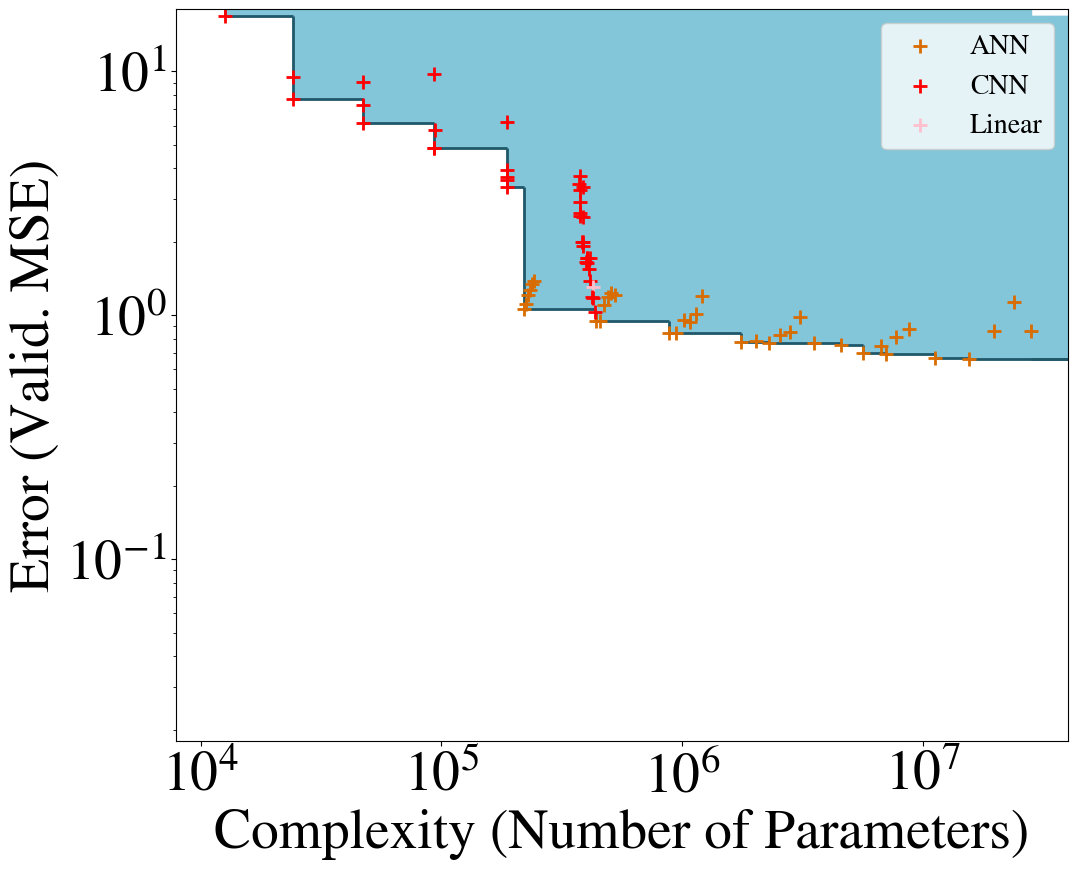

In [121]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys:
    skip = 0
    if 'linear' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'cnn' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'CNN'; skip = 0
    elif 'dense' in k: col = orange_cmap(1); m='+'; cap = 'ANN'; skip = 0
    elif 'cell_NN' in k: col = pink_cmap(1); m='+'; cap = 'Neural Network (NN) Baseline'; skip = 0
    elif 'seq_feat_sel_NN' in k: col = pink_cmap(5); m='+'; cap = 'NN with Sequentially Selected Features'; skip=0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        print('k=',k)
        col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(data_dict[' num_trainable_params'][k]),
                   data_dict[key_y0][k],
                   s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((3.9, 7.6))
ax.set_ylim((0.018, 18))
# Make y axis log
ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Error (Valid. MSE)')

# For the legend, only keep three entries
# if 'linear' in k
# if 'cnn' in k
# if 'dense' in k
# and use cap as label
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')

# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 3 - Step 2: U-Net, U-Net ++


In [118]:
#key_substrings = ['linear','cnn','dense']
key_substrings = ['linear','cnn','dense','u_net_plusplus','u_net']

In [119]:
parameters2, mse_scores2, pareto_parameters2, pareto_mse_scores2, filtered_keys2 = \
    extract_pareto_data(data_dict, key_substrings, 
                    original_dict=df['model_hyperparams'].unique(), 
                    new_point_1_mse_scores=40, new_point_2_parameters=8,
                    key_x = ' num_trainable_params', key_y = key_y0)	

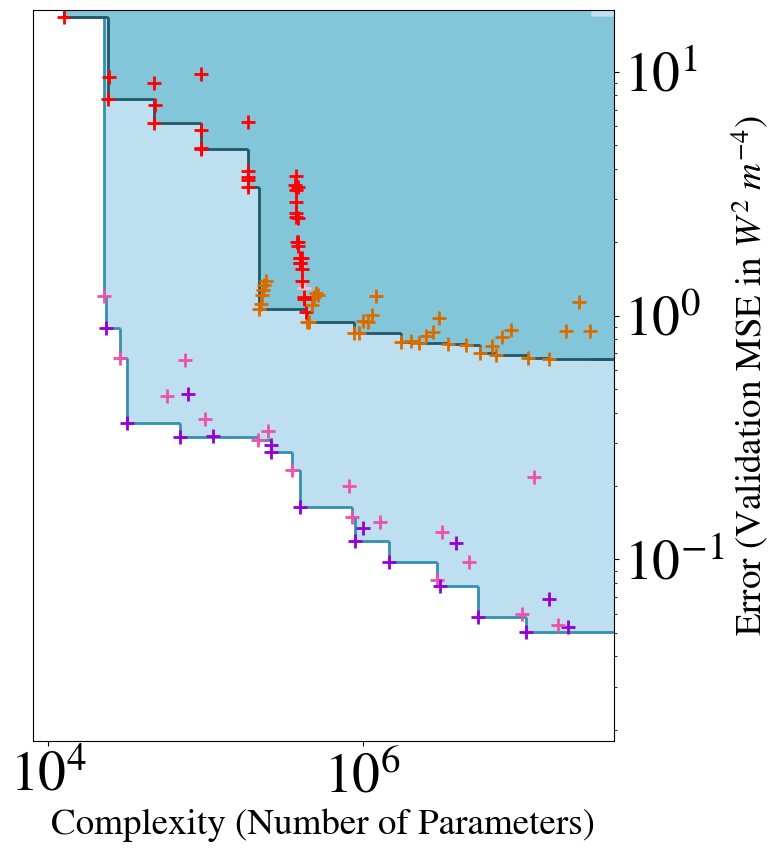

In [120]:
# Plot setup
# fig = plt.figure(figsize=(23/2, 19/2))
# fig = plt.figure(figsize=(35/2.5, 14/2.5))
fig = plt.figure(figsize=(15/2, 19/2))
ax = fig.add_subplot(111)

# Color the area above the Pareto front (Step 2)
for i in range(len(pareto_parameters2) - 1):
    ax.fill_betweenx([pareto_mse_scores2[i], max(mse_scores2)], 
                     pareto_parameters2[i], pareto_parameters2[i + 1], 
                     color=colors_fig1['light_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores2), max(mse_scores2)], pareto_parameters2[-1], max(parameters2), 
                 color=colors_fig1['light_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores2[0], max(mse_scores2)], min(parameters2), max(parameters2), 
                 color=colors_fig1['light_blue'])

# Draw the Pareto front with vertical and horizontal lines (Step 2)
for i in range(len(pareto_parameters2)):
    if i > 0:
        ax.vlines(x=pareto_parameters2[i], ymin=pareto_mse_scores2[i-1], 
                  ymax=pareto_mse_scores2[i], color=colors_fig1['deep_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores2[i], xmin=pareto_parameters2[i], 
              xmax=pareto_parameters2[i+1] if i+1 < len(pareto_parameters2) else max(parameters2), 
              color=colors_fig1['deep_blue'], linewidth=2)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in filtered_keys2:
    skip = 0
    if 'linear' in k: col = red_cmap(2); m='+'; cap = 'Linear'; skip = 0
    elif 'cnn' in k or 'sq_bfgs_regimes' in k: col = 'red'; m='+'; cap = 'CNN'; skip = 0
    elif 'dense' in k: col = orange_cmap(1); m='+'; cap = 'ANN'; skip = 0
    elif 'u_net_plusplus' in k: col = pink_cmap(5); m='+'; cap = 'U-Net ++'; skip=0
    elif 'u_net' in k: col = pink_cmap(1); m='+'; cap = 'U-Net'; skip = 0
    elif 'pysr' in k: col = green_cmap(5); m='+'; cap = 'Discovered PySR equation'; skip = 0
    elif 'gpgomea' in k: col = green_cmap(2); m='+'; cap = 'Discovered GP-GOMEA equation'; skip = 0
    else: 
        print('k=',k)
        col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(data_dict[' num_trainable_params'][k]),
                   data_dict[key_y0][k],
                   s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((3.9, 7.6))
ax.set_ylim((0.018, 18))
# Make y axis log
ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Number of Parameters)',fontsize=2*fz/3)
plt.ylabel('Error (Validation MSE in $W^2\ m^{-4}$)',fontsize=2*fz/3)

if key_y0 == ' complex_heating_rate_mse_k2_day02':
    # Move y label to the right-hand side of the plot
    ax.yaxis.set_label_position("right")
    # Move the y tick labels to the right hand side of the plot
    ax.yaxis.tick_right()
else:
    plt.legend(loc='lower left')
    # Eliminate all redondant legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')
    # Only keep the labels containing 'U-Net' and 'U-Net ++'
    new_labels = ['U-Net', 'U-Net ++']
    new_handles = [by_label[label] for label in new_labels]
    # Change the color of the 'U-Net ++' label to pink_cmap(5)
    new_handles[1].set_color(pink_cmap(5))
    plt.legend(new_handles, new_labels,fontsize=fz/2, loc='upper right')


# Use scientific notation for x-ticks
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Figure 3 - Step 3: Bi-directional LSTM/GRU

## (May24) Sara's new data

In [122]:
path_folder = '/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/PKL_DATA/Sara_S_2024_05_data/'
# List all pkl files in that folder and open them

# List all .pkl files in the folder
pkl_files = [f for f in os.listdir(path_folder) if f.endswith('.pkl')]

# Function to open and load a pickle file
def load_pkl_file(file_path):
    with open(file_path, 'rb') as file:
        data = pkl.load(file)
    return data

# Dictionary to hold the data from each pkl file
pkl_data = {}

# Open each .pkl file and store its content in the dictionary
for pkl_file in pkl_files:
    full_path = os.path.join(path_folder, pkl_file)
    pkl_data[pkl_file] = load_pkl_file(full_path)

In [123]:
# Print the names of the loaded files and their corresponding data
for file_name, data in pkl_data.items():
    print(f"File: {file_name}")
    #print(f"Keys: {pkl_data.items()}")
    #print(f"Data: {data}\n")

File: timeseries_input_output.pkl
File: mse_complexity_new.pkl
File: timeseries_input.pkl
File: mse_complexity.pkl


In [124]:
for item in pkl_data['timeseries_input.pkl'].items():
    tit,data = item
    print(tit, data.shape)

PW (1000,)
SST (1000,)
T2m (1000,)
qv2m (1000,)
SH (1000,)
LH (1000,)
precip_lg (1000, 1)
pw_anomaly (1000, 32, 32, 1)


In [125]:
for item in pkl_data['timeseries_input_output.pkl'].items():
    tit,data = item
    print(tit, data.shape)

pw_lg (1000,)
Ts_lg (1000,)
T2m_lg (1000,)
q2m_lg (1000,)
precip_lg (1000, 1)
pw_hr (1000, 32, 32, 1)


In [126]:
for item in pkl_data['mse_complexity.pkl'].items():
    print(item)

('dense_1', {'MSE': 0.431, 'complexity': 594689, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_2', {'MSE': 0.49, 'complexity': 108801, 'R2': 0.57, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_3', {'MSE': 0.417, 'complexity': 45057, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_4', {'MSE': 0.424, 'complexity': 29889, 'R2': 0.45, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('org_2_enc_1', {'MSE': 0.14552, 'complexity': 612587, 'R2': 0.88, 'description': 'ANN + Encoder for  Spatial conectivity. ANN has the same number of parameter

In [127]:
for item in pkl_data['mse_complexity_new.pkl'].items():
    print(item)

('dense_1', {'MSE': 0.431, 'complexity': 594689, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_2', {'MSE': 0.49, 'complexity': 108801, 'R2': 0.57, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_3', {'MSE': 0.417, 'complexity': 45057, 'R2': 0.53, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('dense_4', {'MSE': 0.424, 'complexity': 29889, 'R2': 0.45, 'description': 'ANN with 5 layers. Inputs are large scle variables (averaged over a domain of 130x130 km2. )', 'inputs': 'PW, SST, T2m,qv2m, LH,SH'})
('org_2_enc_1', {'MSE': 0.14552, 'complexity': 612587, 'R2': 0.88, 'description': 'ANN + Encoder for  Spatial conectivity. ANN has the same number of parameter

In [128]:
# Create a new data structure to store the model data
model_data = {}

# Iterate through the items in the provided data
for item in pkl_data['mse_complexity_new.pkl'].items():
    model_name, characteristics = item
    for k, v in characteristics.items():
        # Initialize the sub-dictionary for key 'k' if it doesn't exist
        model_data.setdefault(k, {})
        # Initialize the sub-dictionary for model_name if it doesn't exist
        model_data[k].setdefault(model_name, {})
        # Add the value to the sub-dictionary
        model_data[k][model_name] = v

In [129]:
key_substrings = ['dense','org','temporal']

In [130]:
model_data.keys()

dict_keys(['MSE', 'complexity', 'R2', 'description', 'inputs', 'inputs-ANN', 'Input-Encoder', 'output', 'outputs'])

In [131]:
model_data['MSE'].keys()

dict_keys(['dense_1', 'dense_2', 'dense_3', 'dense_4', 'org_2_enc_1', 'org_2_enc_2', 'org_2_enc_RR', 'org_2_enc_decod_RR', 'org_2_enc_decod_RR_RI', 'temporal_2dt_30min', 'temporal_3dt_45min'])

In [132]:
parameters, mse_scores, pareto_parameters, pareto_mse_scores, filtered_keys = \
    extract_pareto_data(model_data, key_substrings, 
                    original_dict=model_data['MSE'].keys(), 
                    new_point_1_mse_scores=1, new_point_2_parameters=7,
                    key_x = 'complexity', key_y = 'MSE')	

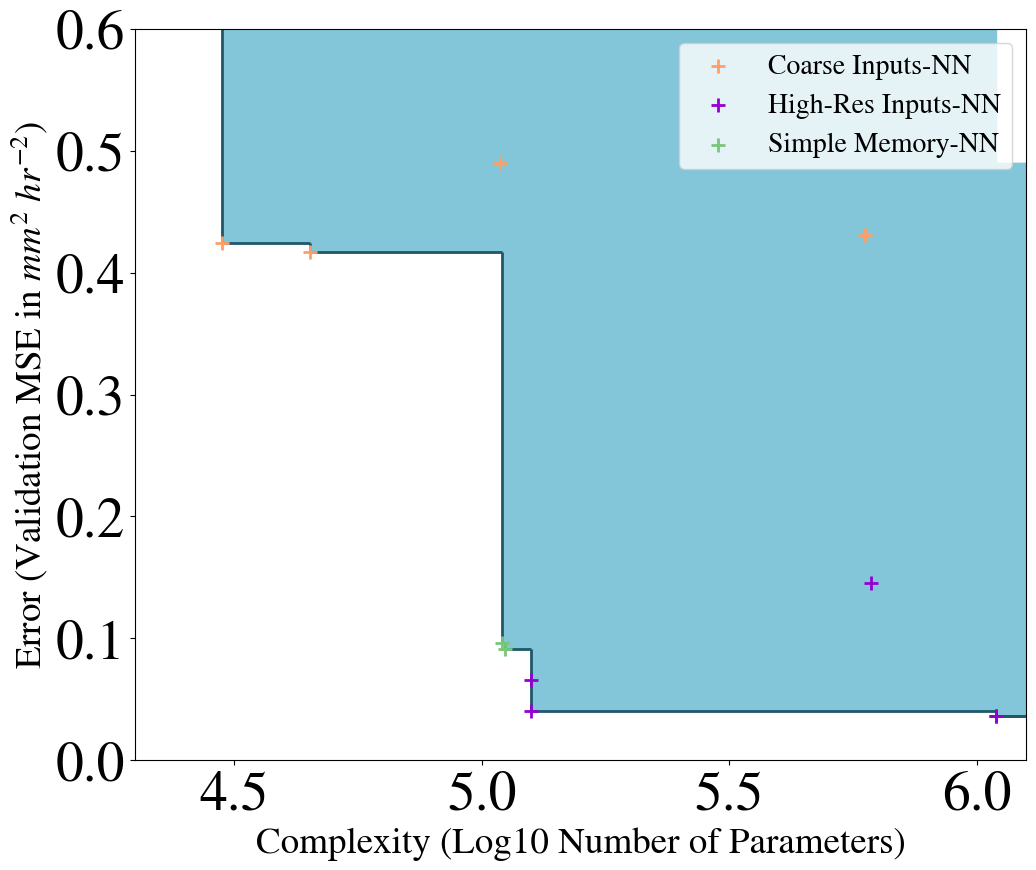

In [136]:
# Plot setup
fig = plt.figure(figsize=(23/2, 19/2))
#fig = plt.figure(figsize=(35/2.5, 14/2.5))
ax = fig.add_subplot(111)

# Color the area above the Pareto front without introducing vertical lines
for i in range(len(pareto_parameters) - 1):
    ax.fill_betweenx([pareto_mse_scores[i], max(mse_scores)], 
                     pareto_parameters[i], pareto_parameters[i + 1], 
                     color=colors_fig1['medium_blue'])
# Fill the rightmost area
ax.fill_betweenx([min(mse_scores), max(mse_scores)], pareto_parameters[-1], max(parameters), 
                 color=colors_fig1['medium_blue'])
# Fill the leftmost area
ax.fill_betweenx([pareto_mse_scores[0], max(mse_scores)], min(parameters), max(parameters), 
                 color=colors_fig1['medium_blue'])

# Draw the Pareto front with vertical and horizontal lines
for i in range(len(pareto_parameters)):
    if i > 0:
        ax.vlines(x=pareto_parameters[i], ymin=pareto_mse_scores[i-1], 
                  ymax=pareto_mse_scores[i], color=colors_fig1['dark_blue'], linewidth=2)
    ax.hlines(y=pareto_mse_scores[i], xmin=pareto_parameters[i], 
              xmax=pareto_parameters[i+1] if i+1 < len(pareto_parameters) else max(parameters), 
              color=colors_fig1['dark_blue'], linewidth=2)

# Plot all points except NNs/equations
for k in model_data['MSE'].keys():
    if 'dense' in k: col = red_cmap(3); m='+'; cap = 'Coarse Inputs-NN'; skip = 0
    elif 'org' in k: col = pink_cmap(5); m='+'; cap = 'High-Res Inputs-NN'; skip=0
    elif 'temporal' in k: col = green_cmap(2); m='+'; cap = 'Simple Memory-NN'; skip = 0
    else: 
        if 'NN' in k: col = pink_cmap(2); m = '+'; cap = 'Non-Local NN'; skip = 0
        else: 
            print('k=',k)
            col='gray'; m = '+'; skip = 0
    if skip==0:
        ax.scatter(np.log10(model_data['complexity'][k]),
               model_data['MSE'][k],
               s=siz,color=col,zorder=2,marker=m,label=cap)

# Set limits
ax.set_xlim((4.3, 6.1))
ax.set_ylim((0,0.6))
# # Make y axis log
# ax.set_yscale('log')

# Improve the plot
plt.xlabel('Complexity (Log10 Number of Parameters)', fontsize=2*fz/3)
plt.ylabel('Error (Validation MSE in $mm^2\ hr^{-2}$)', fontsize=2*fz/3)

# For the legend, only keep three entries
# if 'linear' in k
# if 'cnn' in k
# if 'dense' in k
# and use cap as label
plt.legend(loc='upper right')
# Eliminate all redondant legend entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),fontsize=fz/2, loc='upper right')

# Use scientific notation for x-ticks
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'$10^{{{int(x)}}}$'))

plt.show()

### Visualize nc data

In [141]:
def list_and_open_files(path_folder):
    # List all files in the specified directory with .nc extension
    files = [f for f in os.listdir(path_folder) if os.path.isfile(os.path.join(path_folder, f)) and f.endswith('.nc')]
    
    # Open each .nc file with xarray and store the datasets in a list
    datasets = []
    for file in files:
        file_path = os.path.join(path_folder, file)
        try:
            ds = xr.open_dataset(file_path)
            datasets.append(ds)
            print(f"Opened file: {file}")
        except Exception as e:
            print(f"Failed to open file: {file}, error: {e}")
    
    return datasets

In [142]:
# List all nc files in the folder in path_folder and open them with xarray
datasets = list_and_open_files(path_folder)

Opened file: precip.nc
Opened file: pw.nc


In [149]:
datasets[0]

<xarray.Dataset>
Dimensions:  (lon: 9216, lat: 776)
Coordinates:
  * lon      (lon) float32 0.0 0.03906 0.07812 0.1172 ... 359.9 359.9 360.0
  * lat      (lat) float32 -14.96 -14.93 -14.89 -14.85 ... 14.89 14.93 14.96
Data variables:
    pracc    (lat, lon) float32 ...

In [150]:
datasets[1]

<xarray.Dataset>
Dimensions:  (lon: 9216, lat: 776)
Coordinates:
    time     datetime64[ns] ...
  * lon      (lon) float32 0.0 0.03906 0.07812 0.1172 ... 359.9 359.9 360.0
  * lat      (lat) float32 -14.96 -14.93 -14.89 -14.85 ... 14.89 14.93 14.96
Data variables:
    qvi      (lat, lon) float32 ...

In [147]:
# Visualization function
def plot_datasets(datasets):
    for ds in datasets:
        for var in ds.data_vars:
            plt.figure()
            ds[var].plot()
            plt.title(var)
            plt.show()

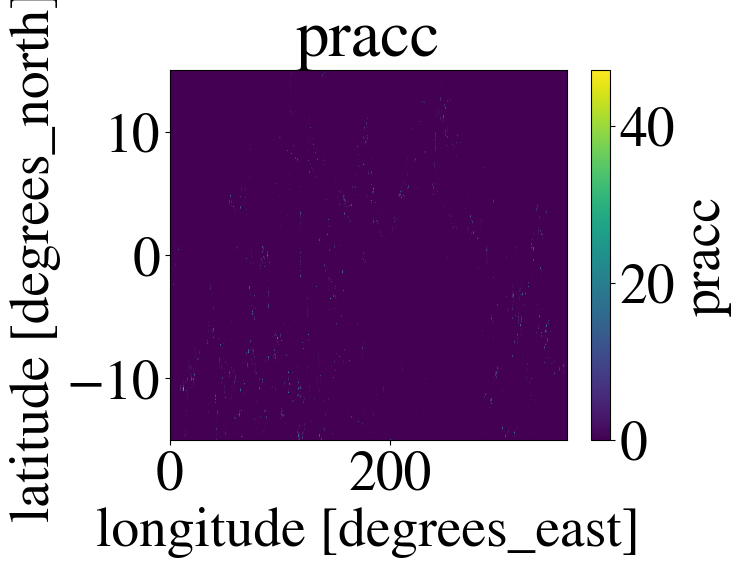

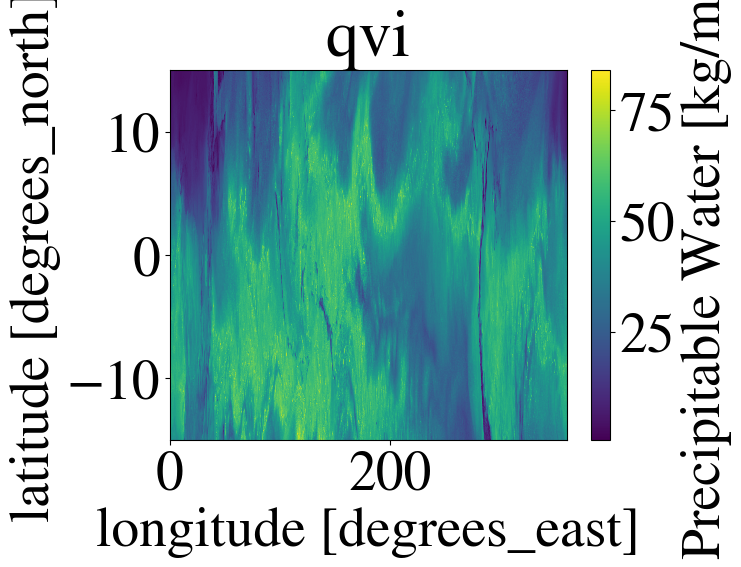

In [148]:
plot_datasets(datasets)

## (OLD) Cloud fraction with DYAMOND

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/Arthur_04_26/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


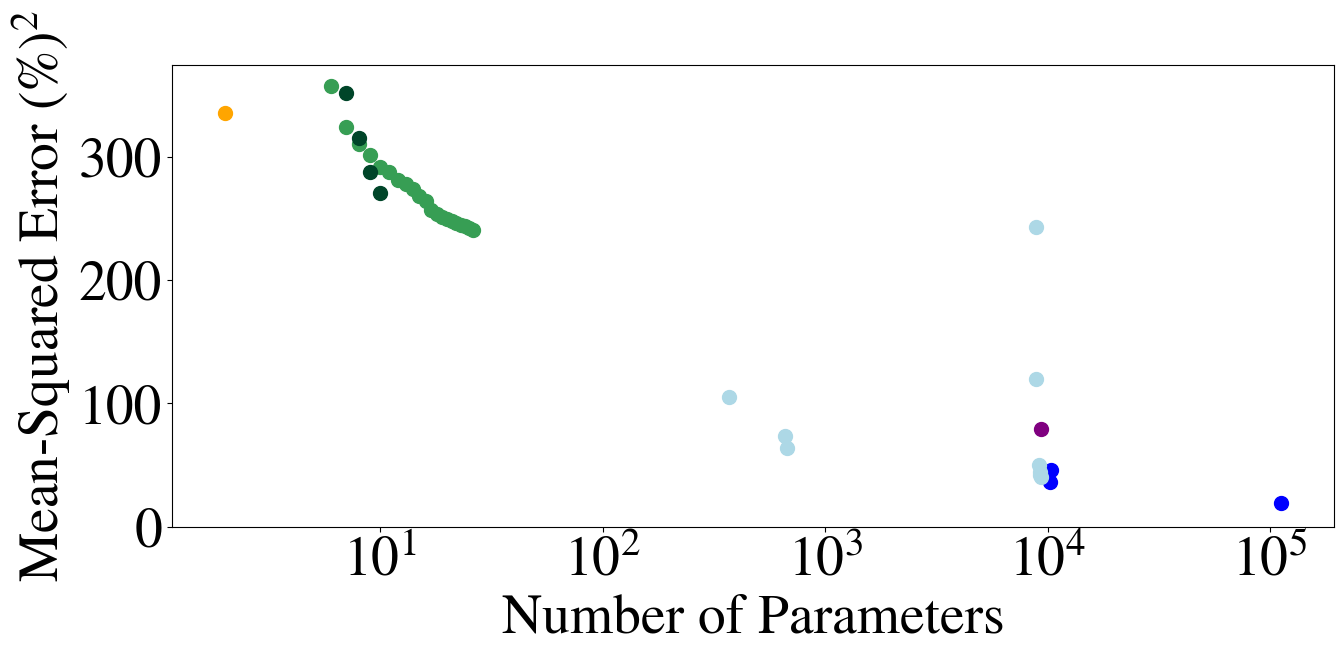

In [20]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

# CS = ax.contour(x_lognparam, y_mse, BIC.T/1e9,zorder=0)
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in dyamond['Complexity/Number of parameters'].keys():
    if 'lin' in k: col = Green3_cmap(1)
    elif 'grid_search' in k: col = 'orange'
    elif 'pol_deg_2' in k: col = Green3_cmap(2)
    elif 'pol_deg_3' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    elif 'seq_feat_sel_NN' in k: col = 'lightblue'
    else: col = 'b'
    ax.scatter(np.log10(dyamond['Complexity/Number of parameters'][k]),
               dyamond['MSE scores on validation set'][k],
               s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

ax.set_ylim((0,375))

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

## Cloud fraction

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/Arthur_04_26/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator


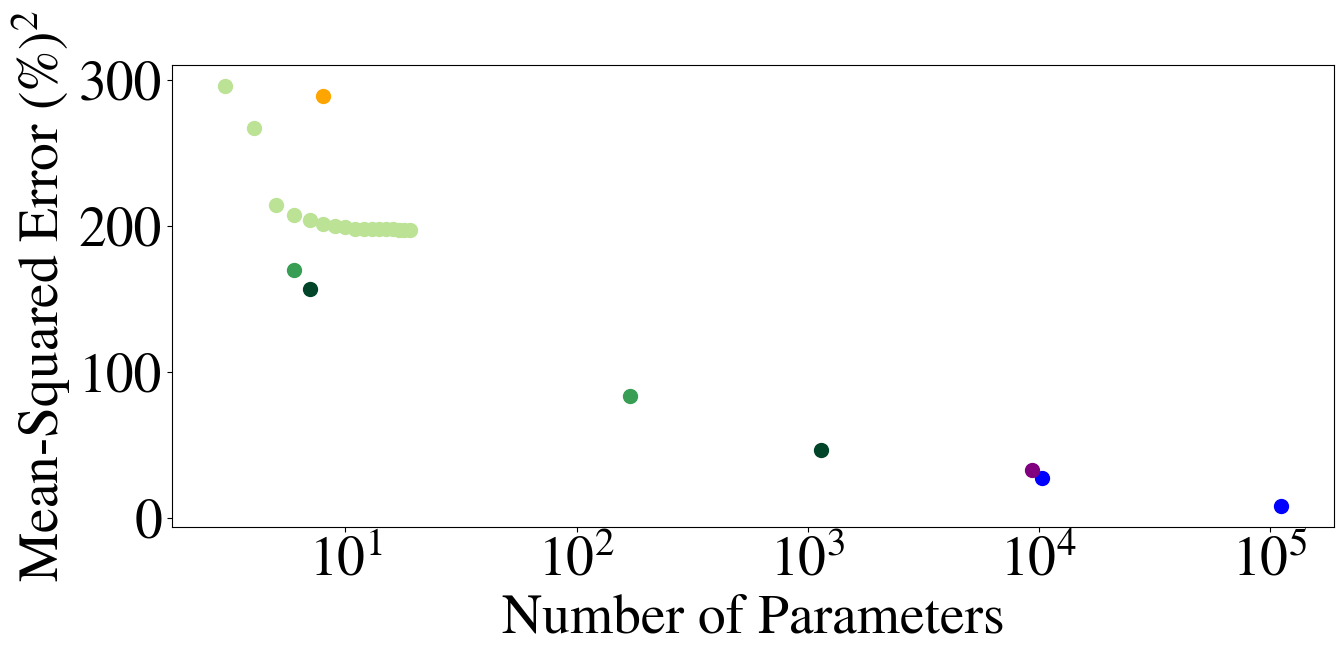

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

# CS = ax.contour(x_lognparam, y_mse, BIC.T/1e9,zorder=0)
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in mse_scores.keys():
    if 'lin' in k: col = Green3_cmap(1)
    elif 'sq' in k: col = 'orange'
    elif 'pol_deg_2' in k: col = Green3_cmap(2)
    elif 'pol_deg_3' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'b'
    ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

In [22]:
mse_scores.keys()

dict_keys(['column_NN', 'region_NN', 'cell_NN', 'pol_deg_3', 'pol_deg_3_feat_6', 'pol_deg_2', 'pol_deg_2_feat_5', 'lin_2', 'lin_3', 'lin_4', 'lin_5', 'lin_6', 'lin_7', 'lin_8', 'lin_9', 'lin_10', 'lin_11', 'lin_12', 'lin_13', 'lin_14', 'lin_15', 'lin_16', 'lin_17', 'lin_18', 'sq_man_tun'])

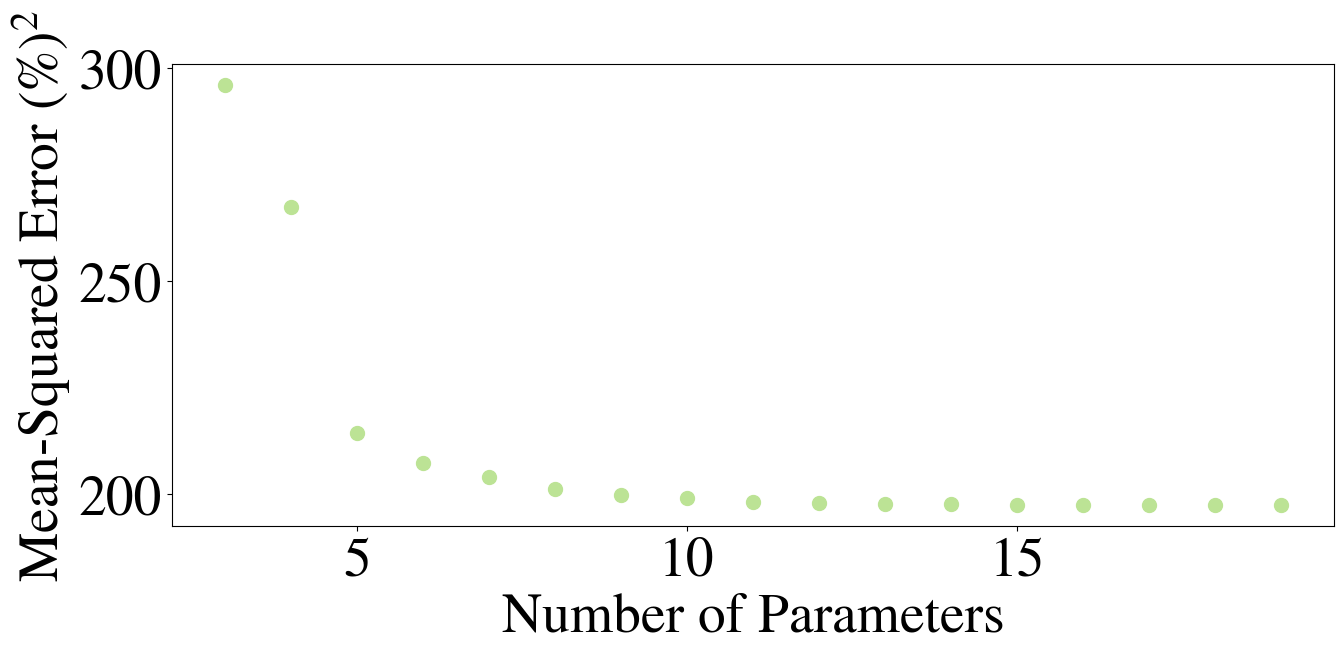

In [23]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for k in mse_scores.keys():
    if 'lin' in k: 
        col = Green3_cmap(1)
        ax.scatter(no_param[k],mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
plt.draw()

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/Arthur_04_26/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator


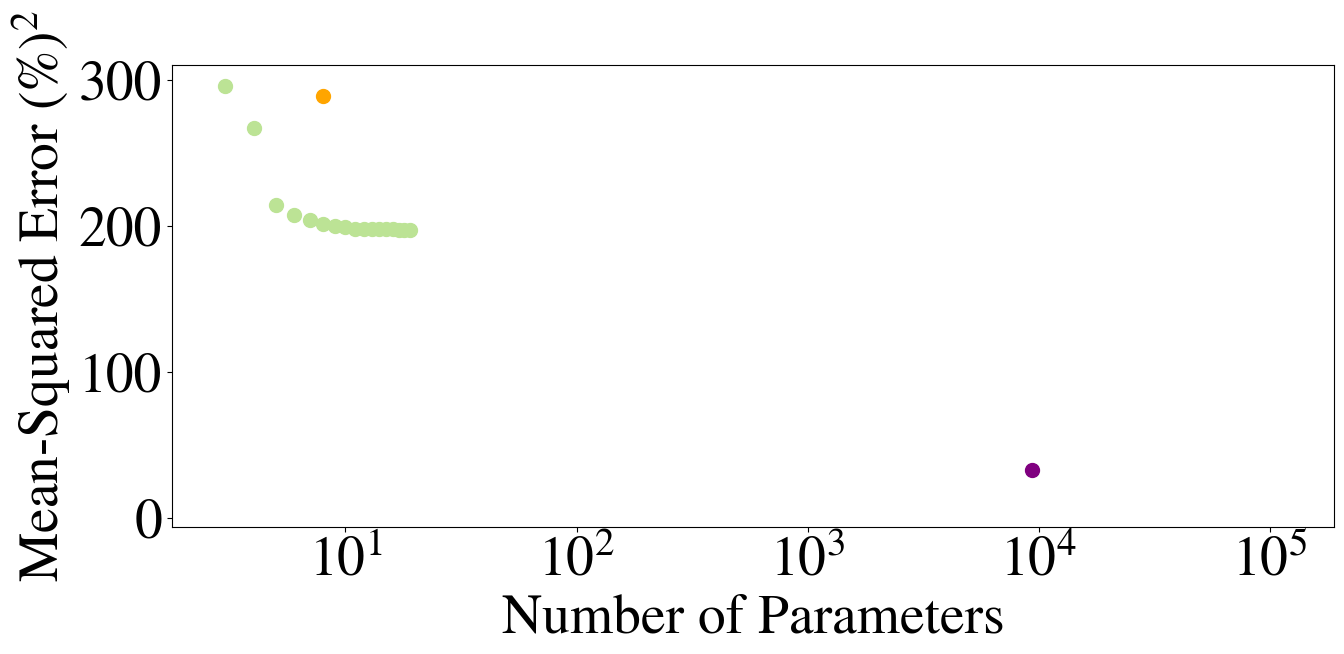

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,6))



for k in mse_scores.keys():
    plot = True
    if 'lin' in k: col = Green3_cmap(1)
    elif 'sq' in k: col = 'orange'
    elif 'cell_NN' in k: col = 'purple'
    else: plot=False
    if plot: ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
ax.set_ylim(YLIM0); ax.set_xlim(XLIM0)
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);



NameError: name 'x_lognparam' is not defined

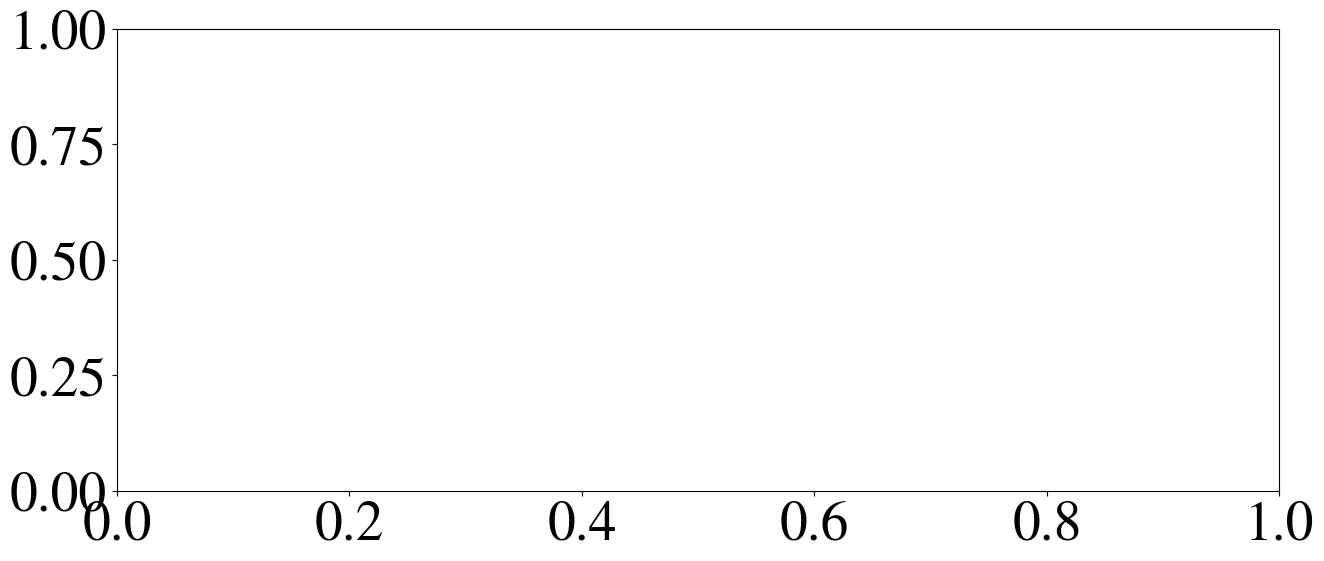

In [25]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

CS = ax.contourf(x_lognparam, y_mse, AIC.T/1e9,zorder=0,cmap='Blues')
# ax.clabel(CS, inline=True, fontsize=fz/2)

for k in ['sq_man_tun','cell_NN']:
    if 'sq' in k: col = 'orange'
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'b'
    ax.scatter(np.log10(no_param[k]),mse_scores[k],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (%)$^{2}$')
plt.xlabel('Number of Parameters')
ax.set_ylim(YLIM0); ax.set_xlim(XLIM0)
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

AIC = 2k + n$\log10\left(MSE\right)$    
BIC = k $\ln\left(n\right)$ + n$\log10\left(MSE\right)$  

In [ ]:
n_samples = 8.8e8

In [ ]:
x_lognparam = np.linspace(0,5.25,1000)
y_mse = np.linspace(5,300,200)
AIC = 2*np.outer(10**x_lognparam,y_mse**0)+n_samples*np.outer(x_lognparam**0,np.log10(y_mse))
BIC = np.log(n_samples)*np.outer(10**x_lognparam,y_mse**0)+n_samples*np.outer(x_lognparam**0,np.log10(y_mse))

## SW radiation with GFS

In [ ]:
Ryan_GFS_models.keys()

Index(['model_type', 'model_hyperparams', 'num_model_params',
       'shortwave_surface_down_flux_mae_w_m02',
       'shortwave_surface_down_flux_mse_w2_m04'],
      dtype='object')

In [ ]:
set(Ryan_GFS_models['model_type'])

{'cnn', 'dense_net', 'linear_regression', 'u_net', 'u_net_plusplus'}

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


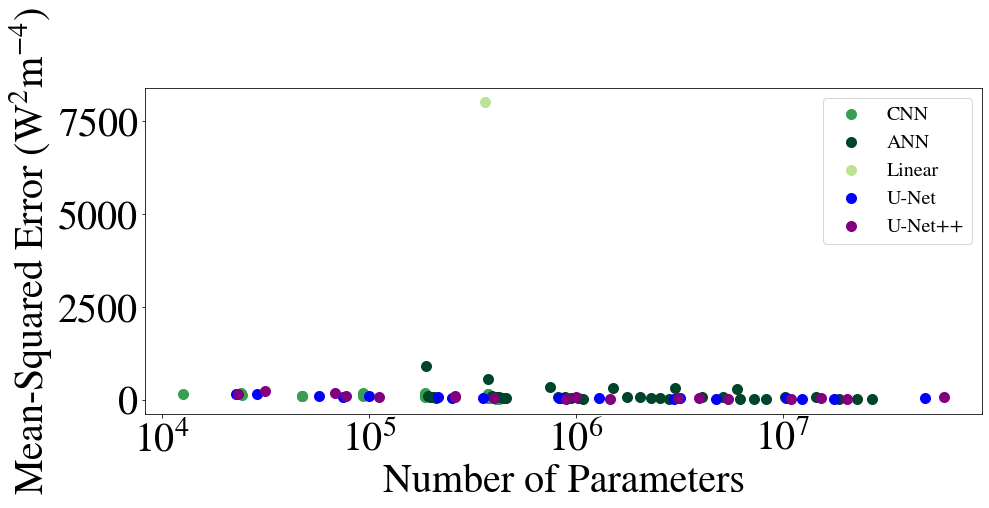

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

LR_0 = 1; CNN_0 = 1; ANN_0 = 1; UN_0 = 1; UNpp_0 = 1;
for i in range(Ryan_GFS_models.shape[0]):
    plot = True
    if Ryan_GFS_models['model_type'][i]=='linear_regression': 
        col = Green3_cmap(1); 
        if LR_0==1: label = 'Linear'; LR_0 = 0; 
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='cnn': 
        col = Green3_cmap(2); 
        if CNN_0==1: label = 'CNN'; CNN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='dense_net': 
        col = Green3_cmap(3); 
        if ANN_0==1: label = 'ANN'; ANN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='u_net': 
        col = 'blue'; 
        if UN_0==1: label = 'U-Net'; UN_0 = 0;
        else: label='';
    elif Ryan_GFS_models['model_type'][i]=='u_net_plusplus': 
        col = 'purple'; 
        if UNpp_0==1: label = 'U-Net++'; UNpp_0 = 0;
        else: label='';
    if plot: ax.scatter(np.log10(Ryan_GFS_models['num_model_params'][i]),
                        Ryan_GFS_models['shortwave_surface_down_flux_mse_w2_m04'][i],
                        s=siz,color=col,zorder=1,label=label)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()
plt.legend(fontsize=fz/2)

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);
#ax.set_ylim((0,180))
YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

## SW radiation

In [ ]:
SW.keys()

dict_keys(['emp201920', 'Unet++', 'Lin_1', 'Lin_2', 'Lin_3', 'Lin_4', 'Lin_5', 'Lin_6', 'Lin_7', 'Lin_8', 'Lin_9', 'Lin_10', 'Quad_1', 'Quad_2', 'Quad_3', 'Quad_4', 'Quad_5', 'Quad_6', 'Quad_7', 'Quad_8', 'Quad_9', 'Quad_78', 'Cubic_1', 'Cubic_2', 'Cubic_3', 'Cubic_4', 'Cubic_5', 'Cubic_6', 'Cubic_7', 'Cubic_364'])

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


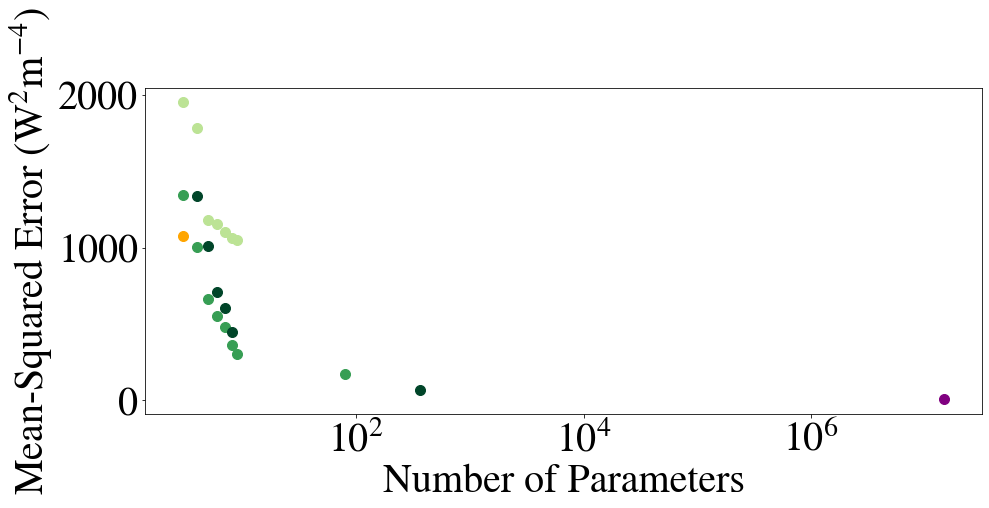

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))


for k in SW.keys():
    plot = True
    if '_1' in k: plot = False
    elif '_2' in k: plot = False
    elif 'Lin' in k: col = Green3_cmap(1)
    elif 'emp' in k: col = 'orange'
    elif 'Quad' in k: col = Green3_cmap(2)
    elif 'Cubic' in k: col = Green3_cmap(3)
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'purple'
    if plot: ax.scatter(np.log10(SW[k]['number_p']),SW[k]['MSE_train'],s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

YLIM0 = ax.get_ylim()
XLIM0 = ax.get_xlim()

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator


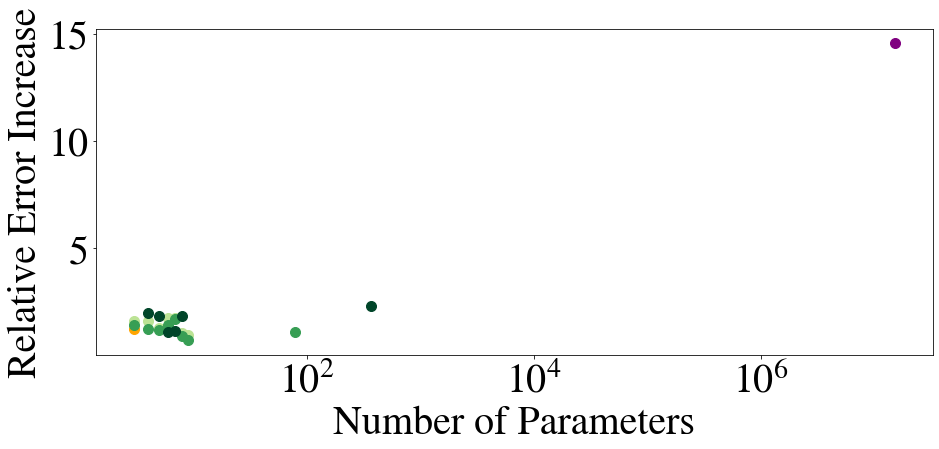

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))


for k in SW.keys():
    plot = True
    if '_1' in k: plot = False
    elif '_2' in k: plot = False
    elif 'Lin' in k: col = Green3_cmap(1); plot = True;
    elif 'emp' in k: col = 'orange'
    elif 'Quad' in k: col = Green3_cmap(2); plot = True; 
    elif 'Cubic' in k: col = Green3_cmap(3); plot = True;
    elif 'cell_NN' in k: col = 'purple'
    else: col = 'purple'
    if plot: 
        ax.scatter(np.log10(SW[k]['number_p']),(SW[k]['MSE_test']-SW[k]['MSE_train'])/SW[k]['MSE_train'],
                   s=siz,color=col,zorder=1)
plt.ylabel('Relative Error Increase')
plt.xlabel('Number of Parameters')
# ax.set_xlim(XLIM0); ax.set_ylim(YLIM0);
plt.draw()

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

In [ ]:
SW['Lin_5']

{'MSE_train': 1176.7370838317738, 'MSE_test': 2693.293029128334, 'number_p': 5}

## Subgrid-scale thermodynamics

In [ ]:
ST

{'LR': {'number_p': 7800, 'MSE_train': 288, 'MSE_test': 785},
 'NN': {'number_p': 122872, 'MSE_train': 172, 'MSE_test': 2242},
 'LR_CI': {'number_p': 7800, 'MSE_train': 294, 'MSE_test': 671},
 'NN_CI': {'number_p': 122872, 'MSE_train': 169, 'MSE_test': 425},
 'Sample_train': 48000000.0,
 'Sample_test': 48000000.0}

/work/FAC/FGSE/IDYST/tbeucler/default/tbeucler/miniconda3/envs/ml4rt/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


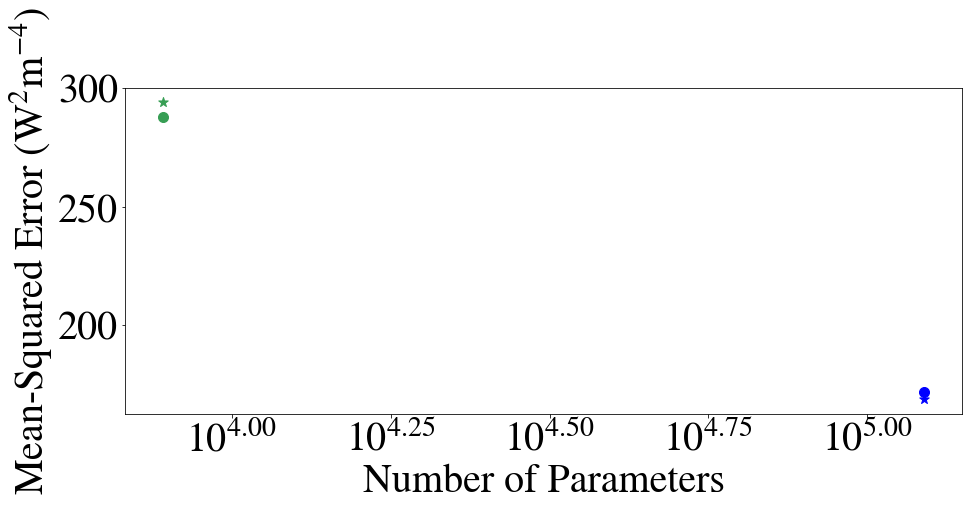

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

for k in ST.keys():
    plot = True
    if 'LR' in k: col = Green3_cmap(2)
    elif 'NN' in k: col = 'b'
    elif 'Sample' in k: plot=False
    if 'CI' in k: marker = '*'
    else: marker = 'o'
    if plot: ax.scatter(np.log10(ST[k]['number_p']),
               ST[k]['MSE_train'],marker=marker,
               s=siz,color=col,zorder=1)
plt.ylabel('Mean-Squared Error (W$^{2}$m$^{-4}$)')
plt.xlabel('Number of Parameters')
plt.draw()
# ax.set_xlim(XLIM0)
# ax.set_ylim(YLIM0)

labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    label = '$10^{'+label+'}$'
    new_labels = np.concatenate((new_labels,[label]))
ax.set_xticklabels(new_labels);

# YLIM0 = ax.get_ylim()
# XLIM0 = ax.get_xlim()